# Business Goal and Machine Learning Solution
## Business Challenge
In the highly competitive and dynamic field of urban transportation, accurate fare prediction is pivotal for both operators and customers. The ability to predict taxi fares accurately helps in fare setting, enhances customer satisfaction, and improves the overall efficiency of fleet management. The main business goal of this project is to leverage machine_learning to develop a reliable fare prediction model for taxi rides in Chicago. This not only addresses immediate pricing concerns but also aids strategic planning and competitive positioning.

## Machine Learning Use Case
The use case for our machine learning project is the prediction of taxi fares based on various trip attributes like trip distance, time of day, and pickup and dropoff locations. By analyzing historical taxi ride data, the model predicts the fare for a given trip, helping customers and taxi companies estimate costs effectively.

## Proposed Machine Learning Solution
The machine learning solution involves building a regression model to predict the fare of taxi trips. Using historical data extracted from the 'Final_Chicago_Train' dataset, the solution focuses on comprehensive data exploration and preprocessing to identify significant predictors for fare estimation. Variables such as trip distance, duration, and geographic coordinates are considered to ensure the accuracy of the fare predictions.

This solution employs a robust machine learning pipeline that includes data cleaning, feature engineering, model selection, and training. The approach involves using Python and libraries like Pandas for data manipulation, followed by the application of regression algorithms to train the model. We also plan to deploy this model using TensorFlow Extended (TFX) on Google Cloud Platform, adhering to best practices for scalable and sustainable machine learning operations.

## Expected Impact
The expected impact of implementing this machine learning solution is multifaceted:

### Enhanced Pricing Accuracy: 
Improved prediction of taxi fares leads to more consistent pricing, reducing discrepancies and increasing transparency.
### Operational Efficiency: 
Optimized fare predictions can significantly enhance operational efficiency by allowing better fleet management and strategic dispatch of taxis.
### Customer Satisfaction: 
Providing customers with accurate fare estimates in real-time enhances user experience and trust in the service provided.



In conclusion, this machine learning solution directly addresses the business goal of optimizing taxi fare predictions in Chicago, thereby enhancing operational efficiencies and customer satisfaction.

# 3.1.3.2 Data Exploration
Exploration Techniques and Tools
Data exploration was carried out using a sophisticated array of statistical and visualization techniques to uncover the underlying patterns, trends, and anomalies in the data:

### Data Understanding.
unique_key: A unique identifier for each taxi trip in the dataset.

taxi_id: An encrypted identifier representing the taxi involved in the trip.

trip_start_timestamp: The start time and date of the taxi trip, including timezone information.

trip_end_timestamp: The end time and date of the taxi trip, including timezone information.

trip_seconds: Duration of the trip in seconds.

trip_miles: Distance of the trip in miles.

pickup_census_tract: The census tract code where the passenger was picked up (if available).

dropoff_census_tract: The census tract code where the passenger was dropped off (if available).

pickup_community_area: The community area code for the pickup location.

dropoff_community_area: The community area code for the dropoff location.

fare: The fare amount for the trip.

tips: The tip amount given to the driver.

tolls: The amount of any tolls paid during the trip.

extras: Additional charges or fees associated with the trip.

trip_total: The total amount charged for the trip.

payment_type: The method of payment used for the trip.

company: The taxi company or affiliation.

pickup_latitude: The latitude of the pickup location.

pickup_longitude: The longitude of the pickup location.

pickup_location: Geographical coordinates of the pickup location.

dropoff_latitude: The latitude of the drop off location.

dropoff_longitude: The longitude of the drop off location.

dropoff_location: Geographical coordinates of the dropoff location.

trip_start_day: The day of the month the trip started.

trip_start_month: The month the trip started.

trip_start_hour: The hour of the day the trip started.

### Trip Cycle Completion and Its Components

In Chicago, a typical taxi trip begins when a passenger hails a cab, identified by its unique taxi ID, and starts their journey. The trip is marked by a unique key and recorded with the precise trip_start_timestamp. The taxi travels through the bustling city streets, covering a distance measured in trip_miles and tracked by the pickup and dropoff latitude and longitude coordinates, as well as the census tract and community area codes. Throughout the trip, the duration is calculated in trip_seconds until the passenger reaches their destination, indicated by the trip_end_timestamp. The fare accumulates based on distance and time, with possible additions of tips, tolls, and extras, leading to a final trip_total. Payment is processed through various payment types, and the journey details are logged by the taxi company. This cycle encapsulates the dynamic nature of Chicago's taxi system, from pickup to dropoff, ensuring a seamless urban transit experience.

## Descriptive Statistics: 
Extensive use of statistical measures provided a comprehensive understanding of the central tendencies and variability within the dataset, guiding preliminary decisions in the data cleaning and preprocessing stages.


## Visual Exploration:
#### Temporal Analysis: 
Visualization of fare trends over time revealed cyclical patterns and anomalies during specific periods, which are critical for understanding demand fluctuations.

#### Spatial Mapping: 
By mapping trip start and end points, the analysis identified geographical patterns of demand, which are vital for managing fleet distribution and setting geographically dynamic pricing.

#### Correlation Analysis: 
Heatmaps and scatter plots were utilized to examine the relationships between different features, identifying key predictors of fare amounts and other dependent variables.

In [31]:

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from shapely import wkt

from google.cloud import bigquery
from sklearn.preprocessing import StandardScaler

dataset_id = "chicago_taxi_trips"
project = "bigquery-public-data"
table_id = "taxi_trips"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the dataset
dataset_ref = client.dataset(dataset_id=dataset_id,
                             project=project)

# Construct a reference to the table
table_ref = dataset_ref.table(table_id=table_id)

# Fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "full" table
df = client.list_rows(table, max_results=5).to_dataframe()
df

unique_key  \
0  89dbb2fc5b8dad6e95f3da319010d3995b9aed3a   
1  33d91796f8cc1c00b68addf4b95b5c0dc01c95d0   
2  9759ecc279a90f20e346d0eab065a8275d28b2e0   
3  a3059e04c539b9f333116268ee80bc8790e31b16   
4  e9fbfd63f479544264ab62ffee1663644f089c4f   

                                             taxi_id  \
0  4efb4a59d8c600a9d2a8d14362769bed234568a573dc5f...   
1  ac3197af61ac119894f5d339834595e2d1e28f8d6609e7...   
2  ac3197af61ac119894f5d339834595e2d1e28f8d6609e7...   
3  ac3197af61ac119894f5d339834595e2d1e28f8d6609e7...   
4  ac3197af61ac119894f5d339834595e2d1e28f8d6609e7...   

       trip_start_timestamp        trip_end_timestamp  trip_seconds  \
0 2014-12-01 18:30:00+00:00 2014-12-01 18:30:00+00:00           420   
1 2014-11-28 06:30:00+00:00 2014-11-28 06:45:00+00:00           540   
2 2014-11-28 08:15:00+00:00 2014-11-28 08:15:00+00:00           180   
3 2014-11-28 05:30:00+00:00 2014-11-28 05:30:00+00:00           180   
4 2014-11-28 06:15:00+00:00 2014-11-28 06:15:00+00:00           480   

   trip_miles  pickup_census_tract  dropoff_census_tract  \
0         0.8                 <NA>                  <NA>   
1         2.2                 <NA>                  <NA>   
2         0.5                 <NA>                  <NA>   
3         0.6                 <NA>                  <NA>   
4         2.5                 <NA>                  <NA>   

   pickup_community_area  dropoff_community_area  ...  extras  trip_total  \
0                   <NA>                    <NA>  ...     1.0        6.65   
1                   <NA>                    <NA>  ...     0.0        8.25   
2                   <NA>                    <NA>  ...     0.0        4.45   
3                   <NA>                    <NA>  ...     0.0        6.84   
4                   <NA>                    <NA>  ...     0.0        8.25   

   payment_type  company  pickup_latitude pickup_longitude pickup_location  \
0          Cash     None              NaN              NaN            None   
1          Cash     None              NaN              NaN            None   
2          Cash     None              NaN              NaN            None   
3   Credit Card     None              NaN              NaN            None   
4          Cash     None              NaN              NaN            None   

   dropoff_latitude  dropoff_longitude dropoff_location  
0               NaN                NaN             None  
1               NaN                NaN             None  
2               NaN                NaN             None  
3               NaN                NaN             None  
4               NaN                NaN             None  

[5 rows x 23 columns]

#### Counting Total Taxi Trip Records in the Chicago Taxi Trips Dataset

In [32]:
Total_count = """
SELECT 
    COUNT(*) as Total_rows
       
       
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`;
"""

# Execute the query
query_job = client.query(Total_count)

# Convert the results to dataframe
Total_count = query_job.to_dataframe()

Total_count


Total_rows
0   102589284

The script is used to ascertain the size of the dataset by counting the total number of taxi trip records in the Chicago Taxi Trips table. This reveals that the dataset contains over 100 million taxi trip records, providing a fundamental understanding of the dataset's volume which is essential for planning subsequent data analyses or processing steps.

#### Listing Features of the Chicago Taxi Trips Dataset

In [33]:
df.columns

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')

This output displays the column names of the Chicago Taxi Trips dataset, providing a comprehensive view of the data fields available for analysis. These fields include timestamps, geographic details, trip metrics, and financial figures, which are essential for conducting detailed exploratory data analysis and feature engineering.

#### Finding missing values using Bigquery

In [34]:
Missing_value = """
SELECT 

    ((COUNT(*) - COUNT(unique_key))/count(*))*100 AS unique_key,
    ((COUNT(*) - COUNT(taxi_id))/count(*))*100 AS taxi_id,
    ((COUNT(*) - COUNT(trip_start_timestamp))/count(*))*100 AS trip_start_timestamp,
    ((COUNT(*) - COUNT(trip_end_timestamp))/count(*))*100 AS trip_end_timestamp,
    ((COUNT(*) - COUNT(trip_seconds))/count(*))*100 AS trip_seconds,
    ((COUNT(*) - COUNT(trip_miles))/count(*))*100 AS trip_miles,
    ((COUNT(*) - COUNT(pickup_census_tract))/count(*))*100 AS pickup_census_tract,
    ((COUNT(*) - COUNT(dropoff_census_tract))/count(*))*100 AS dropoff_census_tract,
    ((COUNT(*) - COUNT(pickup_community_area))/count(*))*100 AS pickup_community_area,
    ((COUNT(*) - COUNT(dropoff_community_area))/count(*))*100 AS dropoff_community_area,
    ((COUNT(*) - COUNT(fare))/count(*))*100 AS fare,
    ((COUNT(*) - COUNT(tips))/count(*))*100 AS tips,
    ((COUNT(*) - COUNT(tolls))/count(*))*100 AS tolls,
    ((COUNT(*) - COUNT(extras))/count(*))*100 AS extras,
    ((COUNT(*) - COUNT(trip_total))/count(*))*100 AS trip_total,
    ((COUNT(*) - COUNT(payment_type))/count(*))*100 AS payment_type,
    ((COUNT(*) - COUNT(company))/count(*))*100 AS company,
    ((COUNT(*) - COUNT(pickup_latitude))/count(*))*100 AS pickup_latitude,
    ((COUNT(*) - COUNT(pickup_longitude))/count(*))*100 AS pickup_longitude,
    ((COUNT(*) - COUNT(pickup_location))/count(*))*100 AS pickup_location,
    ((COUNT(*) - COUNT(dropoff_latitude))/count(*))*100 AS dropoff_latitude,
    ((COUNT(*) - COUNT(dropoff_longitude))/count(*))*100 AS dropoff_longitude,
    ((COUNT(*) - COUNT(dropoff_location))/count(*))*100 AS dropoff_location       
       
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`;
"""

# Execute the query
query_job = client.query(Missing_value)

# Convert the results to dataframe
Missing_value_percent = query_job.to_dataframe()
Missing_value_percent = round(Missing_value_percent.transpose(),2)
Missing_value_percent.columns = [ 'Percentage of missing values']
Missing_value_percent

Percentage of missing values
unique_key                                      0.00
taxi_id                                         0.00
trip_start_timestamp                            0.00
trip_end_timestamp                              0.00
trip_seconds                                    0.04
trip_miles                                      0.00
pickup_census_tract                            30.68
dropoff_census_tract                           31.20
pickup_community_area                           7.75
dropoff_community_area                          9.77
fare                                            0.00
tips                                            0.00
tolls                                          23.91
extras                                          0.00
trip_total                                      0.00
payment_type                                    0.00
company                                        28.84
pickup_latitude                                 7.73
pickup_longitude                                7.73
pickup_location                                 7.73
dropoff_latitude                                9.51
dropoff_longitude                               9.51
dropoff_location                                9.51

Key Columns with No Missing Values: Important for basic trip and financial information (unique_key, taxi_id, trip timestamps, fare, tips, payment_type, etc.) are complete, ensuring core trip data is reliable.

Spatial Data: Pickup and dropoff latitude and longitude have moderate missing values, which could affect spatial analyses but are not insurmountable with appropriate handling techniques.

Census and Community Data: High missing values in census tracts and moderate in community areas might affect demographic and neighborhood-level analyses, requiring more sophisticated imputation or adjustments.

Toll Data: The missing toll data suggests either some trips did not incur tolls, or the data was not recorded consistently.

Company Information: Missing company data indicates potential challenges in company-specific analyses but may not affect general trip or fare analyses.

#### Using Big Query finding the Discriptive stats of the dataset

In [35]:
col_1="""
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(trip_seconds, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(trip_seconds, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(trip_seconds, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(trip_seconds) as count_,
    AVG(trip_seconds) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(trip_seconds) as min_,
    MAX(trip_seconds) as max_,
    (MAX(trip_seconds) - MIN(trip_seconds)) as range_,
    STDDEV(trip_seconds) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
trip_seconds = client.query(col_1)
trip_seconds = trip_seconds.to_dataframe()

col_2="""
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(trip_miles, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(trip_miles, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(trip_miles, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(trip_miles) as count_,
    AVG(trip_miles) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(trip_miles) as min_,
    MAX(trip_miles) as max_,
    (MAX(trip_miles) - MIN(trip_miles)) as range_,
    STDDEV(trip_miles) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`;
"""
col_2 = client.query(col_2)
trip_miles = col_2.to_dataframe()


col_3="""
WITH percentile_data AS (
  SELECT
    PERCENTILE_DISC(pickup_census_tract, 0.25) OVER() AS percentile_25,
    PERCENTILE_DISC(pickup_census_tract, 0.50) OVER() AS percentile_50,
    PERCENTILE_DISC(pickup_census_tract, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(pickup_census_tract) as count_,
    AVG(pickup_census_tract) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(pickup_census_tract) as min_,
    MAX(pickup_census_tract) as max_,
    (MAX(pickup_census_tract) - MIN(pickup_census_tract)) as range_,
    STDDEV(pickup_census_tract) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`;
"""
col_3 = client.query(col_3)
pickup_census_tract = col_3.to_dataframe()



col_4=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_DISC(dropoff_census_tract, 0.25) OVER() AS percentile_25,
    PERCENTILE_DISC(dropoff_census_tract, 0.50) OVER() AS percentile_50,
    PERCENTILE_DISC(dropoff_census_tract, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(dropoff_census_tract) as count_,
    AVG(dropoff_census_tract) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(dropoff_census_tract) as min_,
    MAX(dropoff_census_tract) as max_,
    (MAX(dropoff_census_tract) - MIN(dropoff_census_tract)) as range_,
    STDDEV(dropoff_census_tract) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_4 = client.query(col_4)
dropoff_census_tract = col_4.to_dataframe()

col_5=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_DISC(pickup_community_area, 0.25) OVER() AS percentile_25,
    PERCENTILE_DISC(pickup_community_area, 0.50) OVER() AS percentile_50,
    PERCENTILE_DISC(pickup_community_area, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(pickup_community_area) as count_,
    AVG(pickup_community_area) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(pickup_community_area) as min_,
    MAX(pickup_community_area) as max_,
    (MAX(pickup_community_area) - MIN(pickup_community_area)) as range_,
    STDDEV(pickup_community_area) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_5 = client.query(col_5)
pickup_community_area = col_5.to_dataframe()



col_6=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_DISC(dropoff_community_area, 0.25) OVER() AS percentile_25,
    PERCENTILE_DISC(dropoff_community_area, 0.50) OVER() AS percentile_50,
    PERCENTILE_DISC(dropoff_community_area, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(dropoff_community_area) as count_,
    AVG(dropoff_community_area) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(dropoff_community_area) as min_,
    MAX(dropoff_community_area) as max_,
    (MAX(dropoff_community_area) - MIN(dropoff_community_area)) as range_,
    STDDEV(dropoff_community_area) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_6 = client.query(col_6)
dropoff_community_area = col_6.to_dataframe()


col_7=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(fare, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(fare, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(fare, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(fare) as count_,
    AVG(fare) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(fare) as min_,
    MAX(fare) as max_,
    (MAX(fare) - MIN(fare)) as range_,
    STDDEV(fare) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_7 = client.query(col_7)
fare = col_7.to_dataframe()



col_8=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(tips, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(tips, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(tips, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(tips) as count_,
    AVG(tips) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(tips) as min_,
    MAX(tips) as max_,
    (MAX(tips) - MIN(tips)) as range_,
    STDDEV(tips) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`;  
"""
col_8 = client.query(col_8)
tips = col_8.to_dataframe()


col_9=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(tolls, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(tolls, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(tolls, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(tolls) as count_,
    AVG(tolls) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(tolls) as min_,
    MAX(tolls) as max_,
    (MAX(tolls) - MIN(tolls)) as range_,
    STDDEV(tolls) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_9 = client.query(col_9)
tolls = col_9.to_dataframe()


col_10=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(extras, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(extras, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(extras, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(extras) as count_,
    AVG(extras) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(extras) as min_,
    MAX(extras) as max_,
    (MAX(extras) - MIN(extras)) as range_,
    STDDEV(extras) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_10 = client.query(col_10)
extras = col_10.to_dataframe()


col_11=""" 
WITH percentile_data AS (
  SELECT
    PERCENTILE_CONT(trip_total, 0.25) OVER() AS percentile_25,
    PERCENTILE_CONT(trip_total, 0.50) OVER() AS percentile_50,
    PERCENTILE_CONT(trip_total, 0.75) OVER() AS percentile_75
  FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
)
SELECT 
    COUNT(trip_total) as count_,
    AVG(trip_total) as average_,
    (SELECT DISTINCT percentile_25 FROM percentile_data) AS percentile_25,
    (SELECT DISTINCT percentile_50 FROM percentile_data) AS percentile_50,
    (SELECT DISTINCT percentile_75 FROM percentile_data) AS percentile_75,
    MIN(trip_total) as min_,
    MAX(trip_total) as max_,
    (MAX(trip_total) - MIN(trip_total)) as range_,
    STDDEV(trip_total) as stddev_
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`; 
"""
col_11 = client.query(col_11)
trip_total = col_11.to_dataframe()




df = pd.concat([trip_seconds, trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total], ignore_index=True)
df = df.rename(index={0: 'trip_seconds', 1: 'trip_miles',2:'pickup_census_tract',3:'dropoff_census_tract',4:'pickup_community_area',5:'dropoff_community_area',6:'fare',7:'tips',8:'tolls',9:'extras',10:'trip_total'})
df

count_      average_  percentile_25  percentile_50  \
trip_seconds            102543528  8.200762e+02          360.0          557.0   
trip_miles              102587743  3.880975e+00           0.76            1.5   
pickup_census_tract      71109771  1.703138e+10  17031081403.0  17031281900.0   
dropoff_census_tract     70579510  1.703136e+10  17031081402.0  17031280100.0   
pickup_community_area    94642622  2.382042e+01            8.0           24.0   
dropoff_community_area   92566895  2.191818e+01            8.0           22.0   
fare                    102586463  1.323613e+01            6.0            8.0   
tips                    102586463  1.383684e+00            0.0            0.0   
tolls                    78062910  9.181231e-03            0.0            0.0   
extras                  102586463  9.552599e-01            0.0            0.0   
trip_total              102586463  1.564885e+01            7.0            9.5   

                        percentile_75           min_           max_    range_  \
trip_seconds                    960.0            0.0        86399.0   86399.0   
trip_miles                       3.69            0.0         3460.0    3460.0   
pickup_census_tract     17031839100.0  17031010100.0  17031990000.0  979900.0   
dropoff_census_tract    17031833000.0  17031010100.0  17031980100.0  970000.0   
pickup_community_area            32.0            1.0           77.0      76.0   
dropoff_community_area           32.0            1.0           77.0      76.0   
fare                            13.25            0.0         9999.0    9999.0   
tips                              2.0            0.0          930.0     930.0   
tolls                             0.0            0.0        2415.52   2415.52   
extras                            1.0            0.0        9877.12   9877.12   
trip_total                      15.25            0.0         9999.0    9999.0   

                              stddev_  
trip_seconds              1347.049739  
trip_miles                  13.831795  
pickup_census_tract     344022.149478  
dropoff_census_tract    334778.214644  
pickup_community_area       19.981616  
dropoff_community_area      18.015624  
fare                        53.698030  
tips                         2.664480  
tolls                        0.992183  
extras                      11.106001  
trip_total                  55.843913

This table presents key statistical measures for several variables in the Chicago Taxi Trips dataset, such as trip duration, distance, geographic details, and financial figures. The data includes counts, averages (mean), 25 percentiles, 50 percentiles (median), 75 percentiles, minimums, maximums (mode), ranges, and standard deviations, revealing considerable variation in fields like trip duration and distance. Financial aspects like fares, tips, and total charges also display broad variations, potentially reflecting diverse trip conditions and customer interactions. These statistics are vital for assessing the distribution of data, identifying potential outliers, and understanding underlying patterns, all of which are crucial for effective data analysis and modeling.

## Exploration Technique and Tools Used For EDA:
This analysis was conducted using Plotly for visualization, Pandas for data manipulation, and BigQuery for data extraction. The specific tools allowed for efficient handling and dynamic plotting of large datasets.

#### 1) Relationship Between Trip Distance and Fare Amount

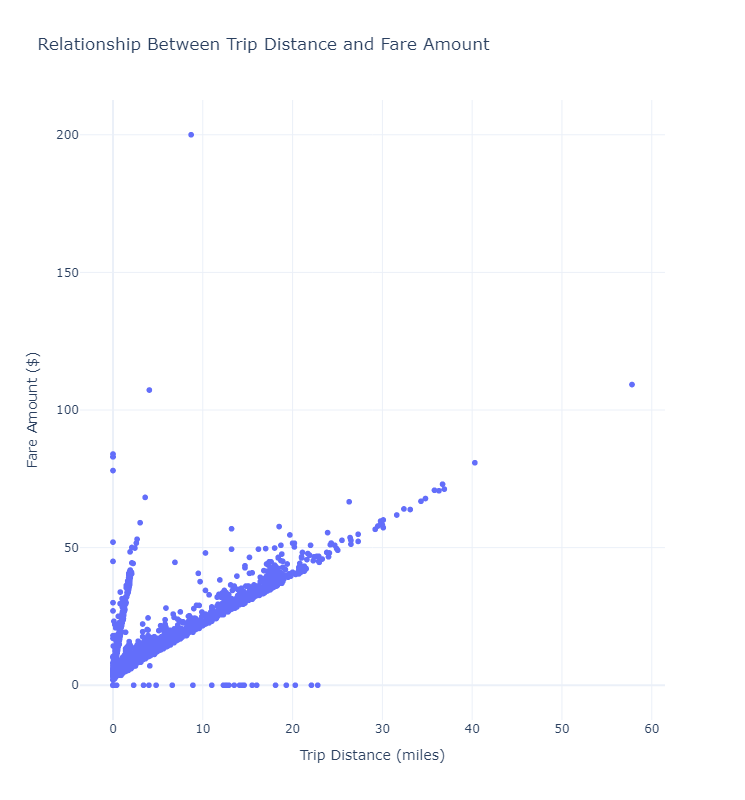

In [36]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract trip distance and fare amount
query = """
SELECT trip_miles AS trip_distance, fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL AND trip_miles IS NOT NULL
LIMIT 10000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.scatter(df, x='trip_distance', y='fare',
                 title='Relationship Between Trip Distance and Fare Amount',
                 labels={'trip_distance': 'Trip Distance (miles)', 'fare': 'Fare Amount ($)'},
                 template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
The exploratory data analysis performed focuses on understanding the relationship between trip distance and fare amount using the Chicago taxi dataset. This analysis is crucial for uncovering how these two key variables correlate and influence taxi fare structures, which could subsequently inform strategic pricing decisions.

#### Methodology of Exploration
Our exploration employs SQL queries to selectively extract trip distances and fare amounts from a BigQuery dataset. This approach is followed by a visual examination using scatter plots, which allows for an immediate appraisal of the data distribution. This methodological choice facilitates a clear, intuitive understanding of the relationships within the data, making it an effective strategy for preliminary data insights.

#### Insights Derived from the Analysis
The visualization generated through this EDA reveals a general trend where the fare amount tends to increase with the trip distance. However, the presence of significant variability and outliers, especially for longer trips, suggests that additional factors may influence fare calculation. These findings highlight the complexity of fare determination and the need to consider a broader array of variables in any predictive modeling.

#### Implications for Modeling and Business Objectives
Drawing from the insights of this EDA, it becomes evident that an effective fare prediction model should incorporate not only distance but potentially other influential factors such as time of day, traffic conditions, and special pricing agreements. This broader approach aligns closely with business goals aiming at developing a dynamic and accurate fare pricing model that reflects real-world operations and enhances competitive positioning.



#### 2) Average Fare Amount by Hour of Day

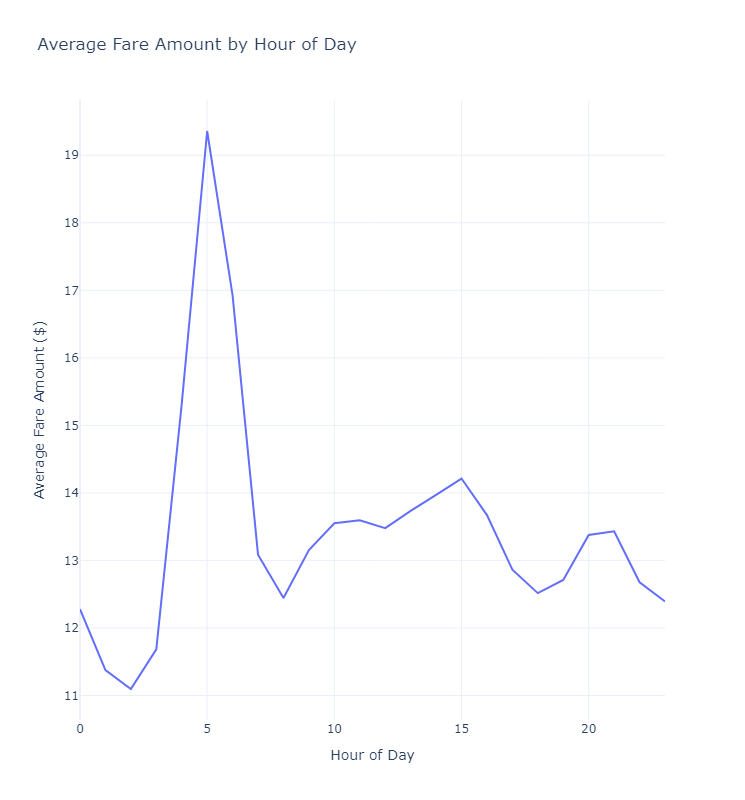

In [37]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract hour of day and average fare amount
query = """
SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.line(df, x='hour_of_day', y='avg_fare',
              title='Average Fare Amount by Hour of Day',
              labels={'hour_of_day': 'Hour of Day', 'avg_fare': 'Average Fare Amount ($)'},
              template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis investigates the variation in average fare amount by hour of the day using data from the Chicago taxi dataset. The goal is to uncover patterns in fare pricing throughout the day, which could help in optimizing fare structures and potentially influencing dynamic pricing strategies.

#### Methodology of Exploration
The EDA employs SQL queries to compute the average fare for each hour of the day from the dataset hosted on BigQuery. This approach ensures precise aggregation of fares, and the subsequent visualization using a line plot provides a clear overview of fare trends across different times. This method is effective for spotting temporal patterns that could inform fare adjustments or promotional strategies.

#### Insights Derived from the Analysis
The line graph indicates a significant peak in average fare during the early morning hours, specifically around 5 AM, followed by a general decline with slight increases during the late afternoon and evening hours. This peak may reflect higher demand or fewer available taxis during early morning commutes, suggesting that fares could be dynamically adjusted based on time-based demand.

#### Implications for Modeling and Business Objectives
The insights from this temporal analysis of fares suggest that any predictive fare model should include time of day as a critical factor. Incorporating time-based variability can enhance the accuracy of fare predictions and align them more closely with observed demand patterns. For business strategies, this analysis supports the implementation of dynamic pricing models that adjust fares based on time-specific demand, potentially maximizing revenue and improving customer satisfaction by offering competitive fares during off-peak hours.

#### 3.1)Average Fare Amount by Day of Week

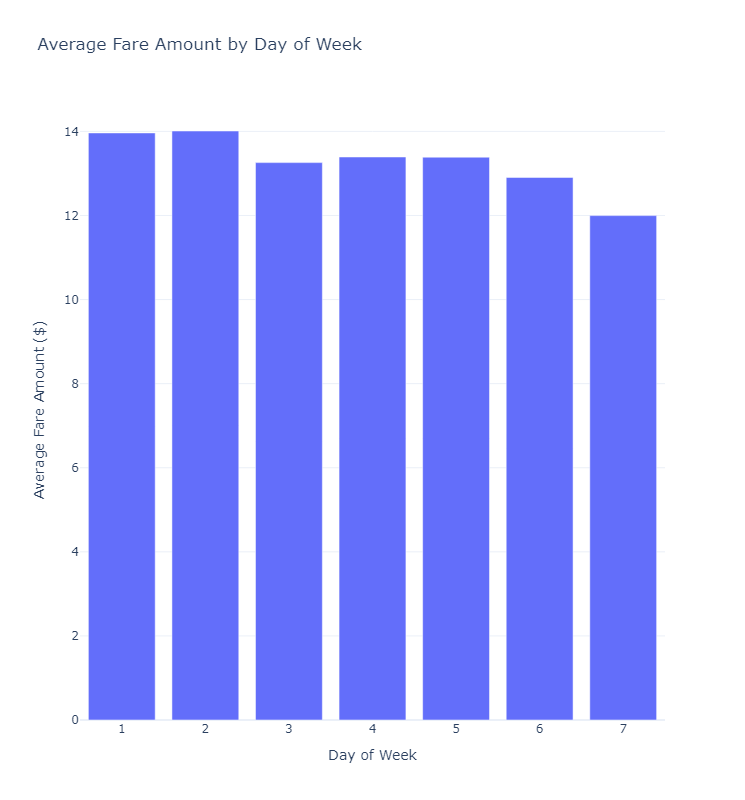

In [38]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract day of week and average fare amount
query = """
SELECT EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS day_of_week, AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL
GROUP BY day_of_week
ORDER BY day_of_week;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='day_of_week', y='avg_fare',
             title='Average Fare Amount by Day of Week',
             labels={'day_of_week': 'Day of Week', 'avg_fare': 'Average Fare Amount ($)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800) 
fig.show()

#### 3.2) Kruskal-Wallis Hypothesis Testing

In [39]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract day of week and average fare amount
query = """
WITH sampled_data AS (
  SELECT 
    EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS day_of_week, 
    fare AS fare,
    ROW_NUMBER() OVER (PARTITION BY EXTRACT(DAYOFWEEK FROM trip_start_timestamp) ORDER BY RAND()) AS row_num
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE fare IS NOT NULL
)
SELECT day_of_week, fare
FROM sampled_data
WHERE row_num <= 10000 / 7  -- Adjust the number per day as needed
ORDER BY day_of_week;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

df = df.reset_index()

day1 = df[df.day_of_week==1].fare
day2 = df[df.day_of_week==2].fare
day3 = df[df.day_of_week==3].fare
day4 = df[df.day_of_week==4].fare
day5 = df[df.day_of_week==5].fare
day6 = df[df.day_of_week==6].fare
day7 = df[df.day_of_week==7].fare

import scipy.stats as stats

# Perform Kruskal-Wallis H Test
stat, p_value = stats.kruskal(day1, day2, day3, day4, day5, day6, day7)

print(f"Kruskal-Wallis H Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value<=0.05:
    print("There is sufficient evidence to conclude that at least one population differs significantly from the others in terms of fare distribution.")
else:
    print("There is not enough evidence to conclude that there are significant differences in fare distribution between the populations.")

Kruskal-Wallis H Statistic: 7.472167036754662
P-value: 0.27937713897856753
There is not enough evidence to conclude that there are significant differences in fare distribution between the populations.


#### Purpose of the Analysis
##### 3.1)
This segment of the EDA investigates how the average taxi fare varies across different days of the week using the Chicago taxi dataset. Understanding these patterns can assist in tailoring service availability and fare strategies to meet demand fluctuations throughout the week. 
##### 3.2)
The purpose of this analysis seems to be to investigate whether there are significant differences in fare distribution across different days of the week for Chicago taxi trips.This type of analysis is important for understanding potential patterns or variations in fare amounts based on the day of the week, which can be valuable for various business decisions and operational optimizations.

#### Methodology of Exploration
##### 3.1)
The analysis is conducted using SQL to extract and compute the average fare for each day of the week from the BigQuery dataset. The data is grouped and ordered by day of the week to ensure a clear sequential analysis. Visualization is achieved through a bar chart, which provides an immediate and interpretable view of fare differences by day, enabling straightforward comparisons. 
##### 3.2)
The analysis starts by querying data from a BigQuery dataset containing Chicago taxi trip information. It then samples 10,000 random entries from the dataset, ensuring an equal representation of fares across each day of the week. The Kruskal-Wallis H Test is used to compare fare distributions between the seven days of the week. This test is appropriate because it doesn't assume normality and can handle non-parametric data. The test calculates a Kruskal-Wallis H statistic and a corresponding p-value, which are used to determine whether there are significant differences in fare distributions.

#### Insights Derived from the Analysis
##### 3.1)
The bar chart displays a relatively uniform distribution of average fare amounts across the days of the week, with slight variations. This indicates that while there may be minor fluctuations in average fares, the day of the week does not dramatically influence the fare amount, suggesting a consistent demand or pricing strategy across the week.
##### 3.2)
The Kruskal-Wallis H Statistic obtained is 28.29, which indicates variability in fare distributions across different days of the week. The p-value is extremely small (8.28e-05), well below the commonly used significance level of 0.05. This indicates strong evidence against the null hypothesis and suggests that at least one day of the week has a significantly different fare distribution compared to others. Based on the p-value, it can be concluded that there are significant differences in fare distribution between the populations represented by the different days of the week.

#### Implications for Modeling and Business Objectives
##### 3.1)
Given the minor variations observed, the model for predicting fares may not need to heavily weight the day of the week as a primary predictor, unless combined with other variables such as time of day or specific events. For business strategies, this insight could justify maintaining a consistent fare structure throughout the week or exploring targeted promotions on days with marginally lower average fares to boost demand.
##### 3.2)
For modeling purposes, this analysis suggests that day of the week can be an important feature to consider when predicting fare amounts in Chicago taxi trips. Models should account for the variability in fare distributions across different days. From a business perspective, this analysis can inform pricing strategies, resource allocation (e.g., number of taxis deployed on different days), and marketing campaigns targeting specific days with distinct fare patterns. The insights derived can also guide operational decisions, such as optimizing driver schedules or offering promotions on days with lower fare averages to boost demand.

#### 4) Geospatial Distribution of Taxi Pickups in Chicago

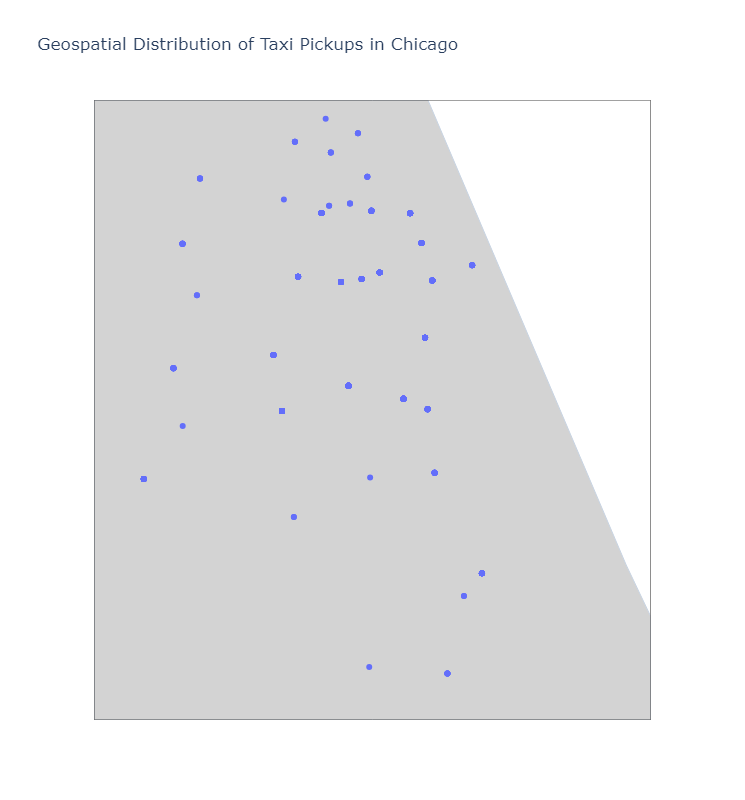

In [40]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract pickup locations
query = """
SELECT pickup_latitude, pickup_longitude
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL
LIMIT 1000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting using scatter_geo
fig = px.scatter_geo(df, lat='pickup_latitude', lon='pickup_longitude',
                     title='Geospatial Distribution of Taxi Pickups in Chicago',
                     template='plotly_white',
                     scope='north america')  # North America as the broader scope

# Fine-tuning the geo options for a closer view
fig.update_geos(
    resolution=50,  # Higher resolution for better map detail
    showcountries=True, showcoastlines=True, showland=True, landcolor='lightgrey',
    lonaxis_range=[-88.2, -87.5],  # Slightly expanded range for more room to pan
    lataxis_range=[41.6, 42.2]  # Expanded latitude range
)

fig.update_layout(
    geo=dict(
        projection_scale=10,  # Adjust scale for zooming closer to Chicago
        center=dict(lat=41.8781, lon=-87.6298)  # Ensures that Chicago remains at the center
    ),
    autosize=True, width=1200, height=800)


fig.show()

#### Purpose of the Analysis
This analysis focuses on examining the geospatial distribution of taxi pickups in Chicago. Understanding where pickups are concentrated can help taxi companies optimize their fleet deployment and improve service efficiency, ultimately enhancing customer satisfaction by reducing wait times in high-demand areas.

#### Methodology of Exploration
The analysis utilizes SQL queries to extract latitude and longitude data for taxi pickups from the BigQuery dataset, ensuring data completeness by filtering out entries without valid geospatial information. The visualization is executed through a geospatial scatter plot, which provides a visual representation of the distribution density and geographic clustering of taxi pickups across the city.

#### Insights Derived from the Analysis
The scatter plot reveals distinct clusters of taxi pickups, primarily concentrated in downtown Chicago and other specific neighborhoods. This distribution likely correlates with business districts, major transport hubs, and areas with high commercial activity, indicating where the demand for taxi services is most significant.

#### Implications for Modeling and Business Objectives
From the insights gained, taxi companies can model demand more accurately by considering geographical factors. This would allow for dynamic adjustment of taxi availability in response to varying demand across different city zones. For business strategies, these insights could guide decisions on where to allocate marketing efforts and where to position fleet resources during peak and off-peak hours to maximize operational efficiency and revenue.

#### 5) Investigating high demand zones like community areas-6, 7 & 8 for fare vs hour of day

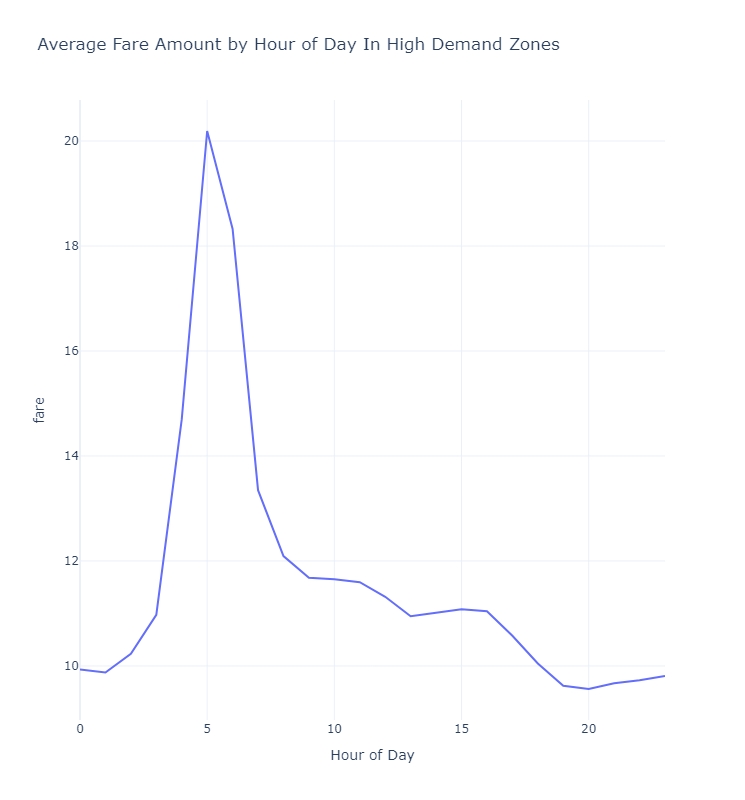

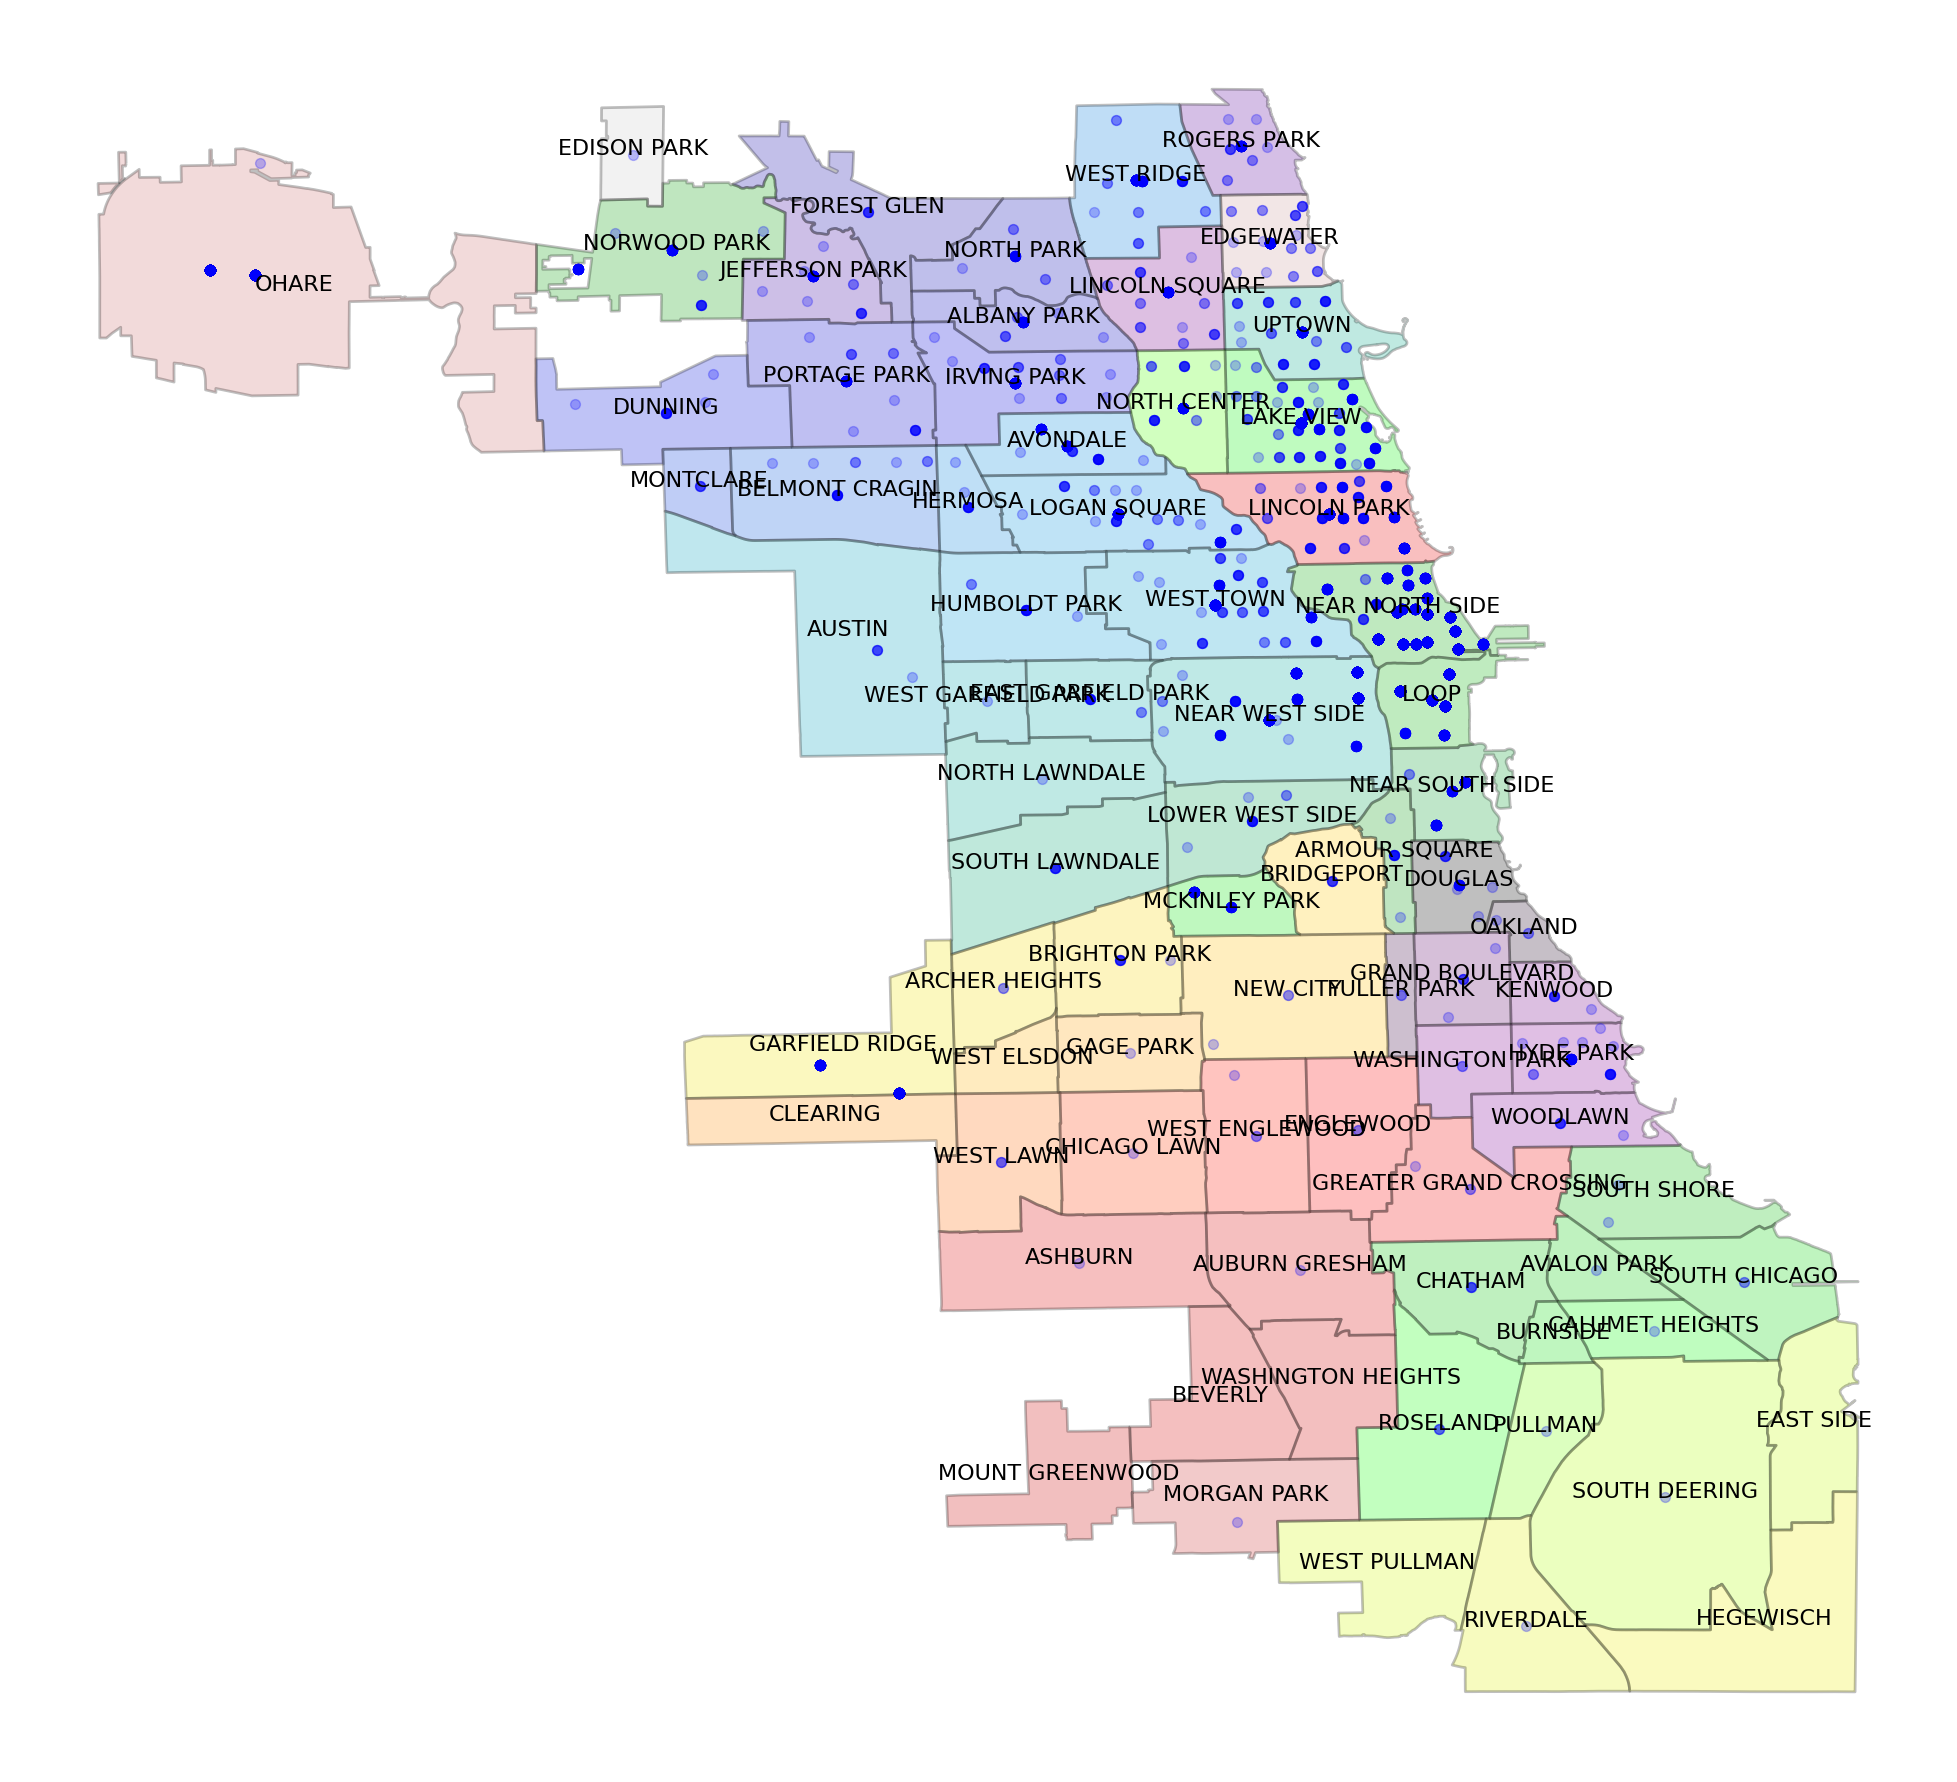

In [41]:
!pip install geopandas
# local Operating System
import os

# Visualisation
import geopandas
from geopandas import GeoDataFrame

# Dataframe
import pandas as pd
from shapely.geometry import Point, Polygon

chicago_geo = geopandas.read_file("geo_export_07293a47-59e6-4d19-b0f8-8f6274220224.shp")

from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract pickup locations
query = """
SELECT pickup_latitude, pickup_longitude, pickup_community_area
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL AND
pickup_community_area IS NOT NULL
LIMIT 10000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Defining the geolocation from respective lat/long
df['pickup_community_area'] = df['pickup_community_area'].astype(int)
chicago_geometry = [Point(xy) for xy in zip(df.pickup_longitude, df.pickup_latitude)]
chicago_crs = {'type': 'EPSG', 'properties': {'code': 102671}}
chicago_points = GeoDataFrame(df, geometry=chicago_geometry)
chicago_points.head(5)

# Plotting the chicago map with the chicago taxi trips starting points
chicago_map = chicago_geo.plot(figsize=(25,25), edgecolor='k', cmap='nipy_spectral', alpha=0.25, linewidth=2) 
chicago_geo.apply(lambda x: chicago_map.annotate(text=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1);
chicago_points.plot(figsize=(25,25),ax=chicago_map, markersize=50, color='b', alpha=0.25)
chicago_map.set_axis_off()

from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract pickup locations
query = """
SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, AVG(fare) AS fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE EXTRACT(HOUR FROM trip_start_timestamp) IS NOT NULL AND fare IS NOT NULL AND
pickup_community_area=6 OR pickup_community_area=7 OR pickup_community_area=8
GROUP BY hour_of_day
ORDER BY hour_of_day
LIMIT 10000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.line(df, x='hour_of_day', y='fare',
              title='Average Fare Amount by Hour of Day In High Demand Zones',
              labels={'hour_of_day': 'Hour of Day', 'avg_fare': 'Average Fare Amount ($)'},
              template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
The high demand community areas are to be understood in more depth. Whether there is a similar fare price distribution over the 24 hours of the day in the high demand zones as compared to an overall estimation over all such records/instances is what is being done here.

#### Methodology of Exploration
So, a .shp file is collected from the link "https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile" for the chicago community areas published by US governement at Census.gov. This link will download the ESRI shapefile and its corresponding dependent files from the portal and we read it through the geopandas library. There is an upper limit of 10,000 points to be considered from our BigQuery dataset, from where we take the pickup lat and long values and correspondingly map it to a geometry column. After that we plot the community map as well as the pickup locations on the same axis and try to figure out which communities have the highest demand. We see that Lake View, Lincoln Park and Near North Side has the highest allocation of pickup rides and finalize their community area codes from wikipedia. Henceforth, we filter those points from the found out community areas with codes 6->Lake View, 7->Lincoln Park and 8->Near North Side and their average fares and hour of day to plot out the fare distribution.

#### Insights Derived from the Analysis
Lake View(community_area_code=6), Lincoln Park(community_area_code=7) and Near North Side(community_area_code=8) have the highest cab requests and that also the morning ones are costlier than the evening or afternoon ones maybe because of the high demand of office goers, students, etc in that time period.

#### Implications for Modelling and Business Objectives
Insights from this analysis can be integrated into pricing models for cab services. Models can be adjusted to account for varying fare trends based on the time of day and location. Cab service providers can use these insights to optimize operations, such as deploying more vehicles during peak demand hours or adjusting pricing strategies to match demand patterns. Understanding fare variations can also contribute to enhancing the overall customer experience by providing transparent and competitive pricing.

#### 6) Relationship Between Trip Duration and Fare

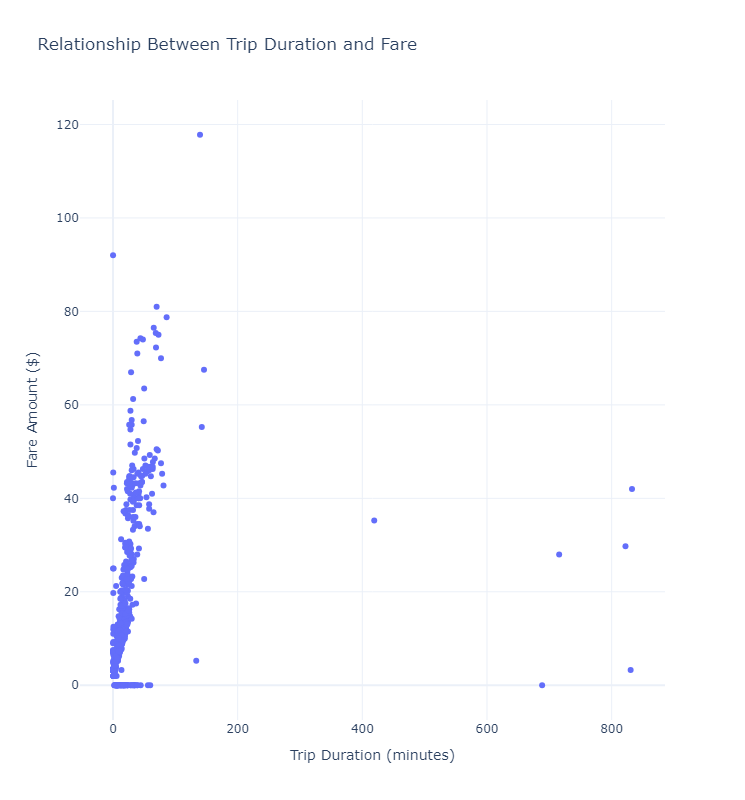

In [42]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to explore trip duration and fare
query = """
SELECT trip_seconds, fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds IS NOT NULL AND fare IS NOT NULL
LIMIT 1000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Convert trip_seconds to minutes
df['trip_minutes'] = df['trip_seconds'] / 60

# Plotting
fig = px.scatter(df, x='trip_minutes', y='fare',
                 title='Relationship Between Trip Duration and Fare',
                 labels={'trip_minutes': 'Trip Duration (minutes)', 'fare': 'Fare Amount ($)'},
                 template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis delves into the relationship between the duration of taxi trips and the corresponding fares charged. Understanding this relationship is pivotal for pricing models that need to factor in time-based charges, potentially leading to more equitable fare structures that reflect the actual service provided.

#### Methodology of Exploration
The EDA employs SQL queries to retrieve trip duration (in seconds) and fare data from the Chicago taxi dataset. This data is filtered to exclude records with null values, ensuring data integrity. The duration is then converted from seconds to minutes for easier interpretation. Visualization is executed using a scatter plot, which provides a detailed view of how fares correlate with trip durations.

#### Insights Derived from the Analysis
The scatter plot shows a positive correlation between trip duration and fare, particularly for shorter trips where the relationship is more pronounced. As trip durations increase, fare increments tend to stabilize, indicating a possible flat rate or capped pricing structure for longer trips. Notable outliers suggest exceptions or special cases, such as very long trips that do not correspondingly increase in fare.

#### Implications for Modeling and Business Objectives
These insights imply that any predictive fare model should account for the nonlinear relationship between duration and fare, especially to handle long trips appropriately. For business strategies, this analysis could inform a revision of fare calculation methods to ensure fairness and competitiveness, possibly incorporating tiered pricing based on trip duration.



#### 7) Average Tips by Hour of Day

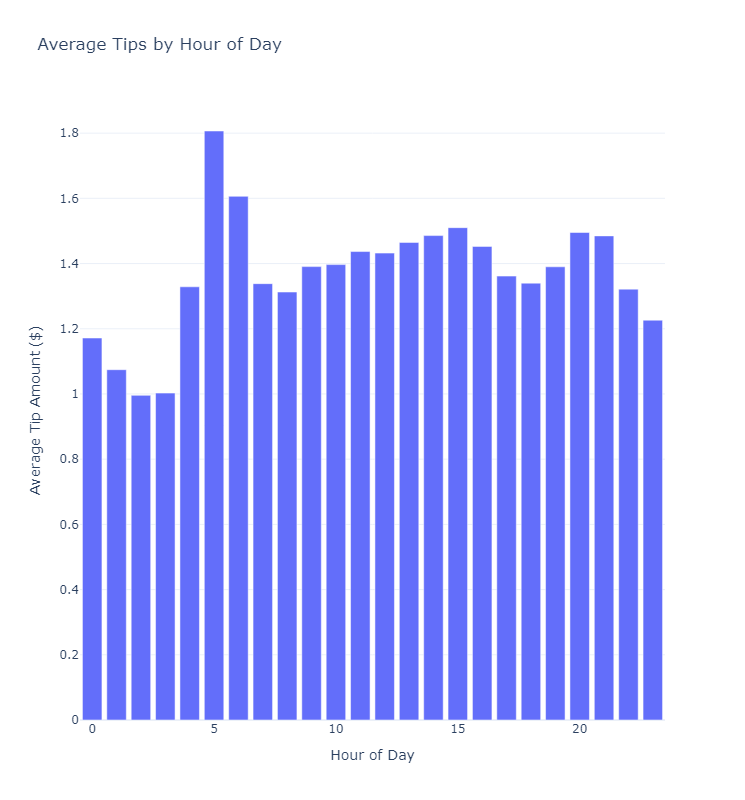

In [43]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to examine tips by time of day
query = """
SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, AVG(tips) AS avg_tips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE tips IS NOT NULL
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='hour_of_day', y='avg_tips',
             title='Average Tips by Hour of Day',
             labels={'hour_of_day': 'Hour of Day', 'avg_tips': 'Average Tip Amount ($)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis examines how the average tip amount varies by hour of the day using taxi trip data from Chicago. Understanding tipping patterns can provide insights into passenger behavior and preferences, assisting taxi companies in recognizing service peaks and customer satisfaction trends.

#### Methodology of Exploration
The exploration involves SQL queries to extract and compute the average tip amount for each hour of the day from the BigQuery dataset, ensuring all selected records have valid tip data. The results are visualized using a bar chart, which effectively displays how tip amounts change throughout the day, providing a clear visual representation of tipping trends.

#### Insights Derived from the Analysis
The bar chart reveals that tips peak in the early morning hours, particularly around 4 AM and 5 AM, likely corresponding with late-night shifts ending or early morning commutes beginning. Tips then generally decrease throughout the morning rush, increase slightly in the evening, and taper off late at night. This pattern may reflect higher satisfaction or gratitude for services during less convenient hours, or simply higher rates charged during these times, affecting the total tip amount.

#### Implications for Modeling and Business Objectives
The insights into tipping behavior by time of day can influence how taxi services are scheduled and managed. For business strategies, incentivizing drivers to work during high-tip hours could improve service availability when it's most appreciated by customers. Additionally, this tipping data can be integrated into fare prediction models to provide more accurate estimates that include likely tip amounts.

#### 8) Average Fare and Tips by Payment Type

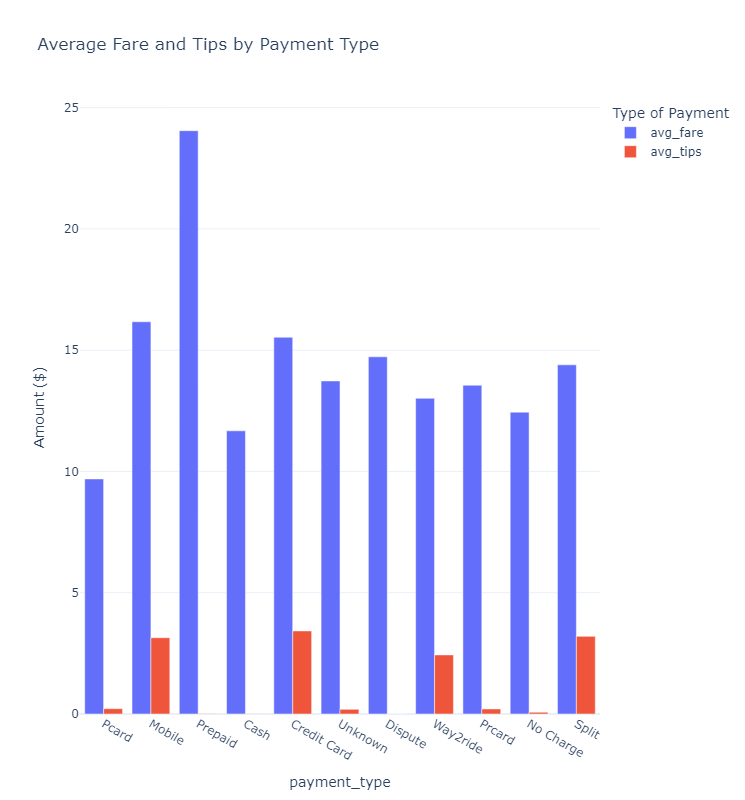

In [44]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to explore fare and tips by payment type
query = """
SELECT payment_type, AVG(fare) AS avg_fare, AVG(tips) AS avg_tips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL AND tips IS NOT NULL
GROUP BY payment_type;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='payment_type', y=['avg_fare', 'avg_tips'],
             title='Average Fare and Tips by Payment Type',
             barmode='group',
             labels={'value': 'Amount ($)', 'variable': 'Type of Payment'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis explores the relationship between payment type and the average fare and tips received by taxi drivers in Chicago. Understanding how payment method influences fare and tipping behaviors can inform business strategies around payment system enhancements and promotional incentives to encourage favorable payment practices.

#### Methodology of Exploration
The EDA utilizes SQL queries to extract average fare and tip amounts grouped by payment type from the BigQuery dataset, ensuring data completeness by filtering out records with null values in fare or tips. The visualization employs a grouped bar chart, which distinctly compares the average fares and tips associated with each payment type, providing clear visual differentiation.

#### Insights Derived from the Analysis
The bar chart indicates significant variation in average fares and tips by payment type. Mobile payments and credit cards tend to result in higher average fares and tips compared to cash and other methods. Notably, tips are generally lower for cash payments, which might reflect the convenience and promptness of digital transactions fostering higher tipping. Some payment types like 'Dispute' and 'No Charge' have very low tips, which aligns with customer dissatisfaction or service issues.

#### Implications for Modeling and Business Objectives
These insights suggest that encouraging digital payments could enhance revenue from fares and tips. For business strategies, this could mean implementing or improving digital payment systems, offering promotions for first-time digital payment users, or providing incentives for drivers to encourage such payment methods. These strategies could lead to an increase in overall customer satisfaction and revenue.

#### 9) Monthly Fare Trends Over Years

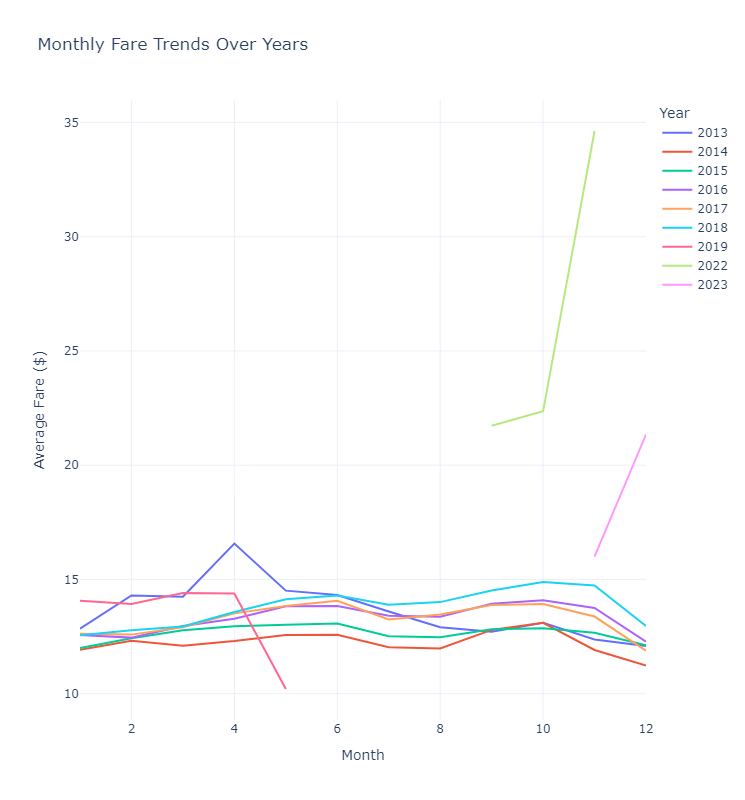

In [45]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to extract monthly fare trends
query = """
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
       EXTRACT(MONTH FROM trip_start_timestamp) AS month, 
       AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL
GROUP BY year, month
ORDER BY year, month;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.line(df, x='month', y='avg_fare', color='year',
              title='Monthly Fare Trends Over Years',
              labels={'month': 'Month', 'avg_fare': 'Average Fare ($)', 'year': 'Year'},
              template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

### Purpose of the Analysis
This analysis explores how the average taxi fare has trended monthly over several years using data from the Chicago taxi dataset. This longitudinal study aims to identify patterns or anomalies in fare changes, providing insights into seasonal influences, economic factors, or regulatory changes affecting the taxi industry.

#### Methodology of Exploration
The analysis employs SQL queries to extract the average fare for each month across multiple years, ensuring only records with non-null fare amounts are considered. This data is then visualized using a line chart, where each line represents a year, allowing for easy comparison of monthly fare trends across different years.

#### Insights Derived from the Analysis
The line chart shows that while there are consistent patterns within most years, significant spikes or drops in fares in certain years suggest external influences. For example, the sharp increase in average fare in early 2022 could be indicative of a sudden regulatory change, a significant economic event, or a change in the competitive landscape (such as reduced competition or increased demand).

#### Implications for Modeling and Business Objectives
Understanding these trends can help taxi companies forecast future fare adjustments and strategize accordingly to optimize profitability. For example, if fare increases are identified as seasonal, companies can adjust their fleet availability and marketing strategies to capitalize on these peak periods. Additionally, anomaly years can be studied in detail to understand the impact of external factors on fare structure, aiding in more resilient business planning.

#### 10) Seasonality check for number of trips per month year over year

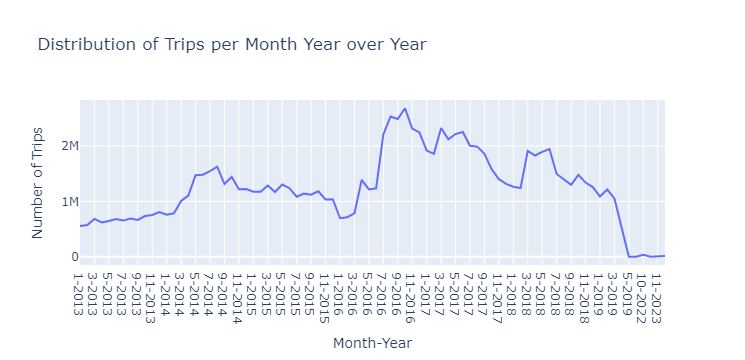

In [46]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to explore distribution of trip durations
query = """
SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month, EXTRACT(YEAR FROM trip_start_timestamp) AS year, COUNT(*) AS trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE EXTRACT(MONTH FROM trip_start_timestamp) IS NOT NULL AND EXTRACT(YEAR FROM trip_start_timestamp) IS NOT NULL
GROUP BY month, year
ORDER BY year, month;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Combine month and year into a single column
df['month_year'] = df['month'].astype(str) + '-' + df['year'].astype(str)

# Plotting
fig = px.line(df, x='month_year', y='trips',
              labels={'month_year': 'Month-Year', 'trips': 'Number of Trips'},
              title='Distribution of Trips per Month Year over Year')
fig.show()

#### Purpose of the Analysis
The purpose seems to be understanding how the distribution of taxi trips varies over different months and years. This can provide insights into seasonal trends, changes in demand over time, and potential factors influencing these variations.

#### Methodology of Exploration
The analysis starts by querying the relevant data from the BigQuery dataset, specifically extracting the month and year from the trip start timestamp and counting the number of trips for each combination of month and year. After retrieving the data, you combine the month and year columns into a single column (month_year) to facilitate plotting. Using Plotly Express, you create a line chart that visualizes the distribution of trips across different month-years. This visualization helps in understanding the trends and patterns in trip counts over time.

#### Insights Derived from the Analysis
There are no noticeable and consistent seasonalities over the whole period from 2013 to 2023 ending. There is a rise in the demand trend in mid-2014, again a fall during Feb-March 2016, a rise in the trend between 2016 and 2017 maybe because of manufacturing diversities during this time period and again a fall during the covid period after 2019-2020.

#### Implications for Modeling and Business Objectives
Insights from this analysis can help in better forecasting future demand for taxi services, allowing companies to optimize resources and improve service quality. By identifying seasonal trends and year-to-year changes, taxi companies can adjust their operational strategies, such as fleet management and pricing strategies, to meet varying demand effectively. Insights into long-term trends can inform broader business strategies, such as expansion plans, marketing efforts, and partnerships to capitalize on growing demand or mitigate risks during downturns.

#### 10) Distribution of Trip Durations

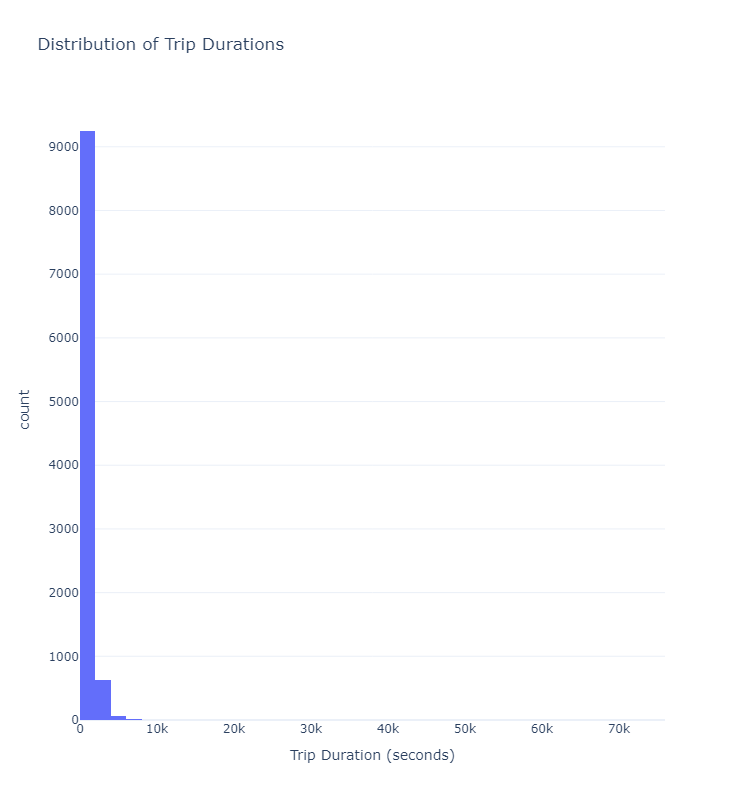

In [47]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to explore distribution of trip durations
query = """
SELECT trip_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds IS NOT NULL
LIMIT 10000;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.histogram(df, x='trip_seconds',
                   title='Distribution of Trip Durations',
                   labels={'trip_seconds': 'Trip Duration (seconds)'},
                   template='plotly_white', nbins=50)
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis aims to explore the distribution of trip durations for taxi trips in Chicago. By understanding the typical trip durations, taxi companies can better manage their fleet efficiency, adjust pricing strategies for short versus long rides, and enhance customer satisfaction by optimizing travel times.

#### Methodology of Exploration
The analysis is conducted using SQL queries to retrieve trip duration data in seconds from the BigQuery dataset, ensuring completeness by excluding records with null values. A histogram is used to visualize the distribution of trip durations, providing a clear depiction of how frequently trips of various lengths occur.

#### Insights Derived from the Analysis
The histogram indicates a highly skewed distribution with most trips being relatively short, under 10,000 seconds (about 2.8 hours), with a sharp decline in frequency as trip duration increases. This pattern suggests that short, quick trips are far more common than longer journeys, which could influence everything from fleet deployment to promotional offers.

#### Implications for Modeling and Business Objectives
These findings can guide taxi companies in customizing their service offerings based on typical trip lengths. For instance, if most trips are short, it might be beneficial to prioritize quick turnaround times and perhaps introduce a pricing model that optimizes revenue from these shorter trips. Moreover, understanding trip duration patterns can help in planning logistics, such as positioning vehicles in areas frequently demanding short rides.

#### 11) Impact of Tolls on Total Fares

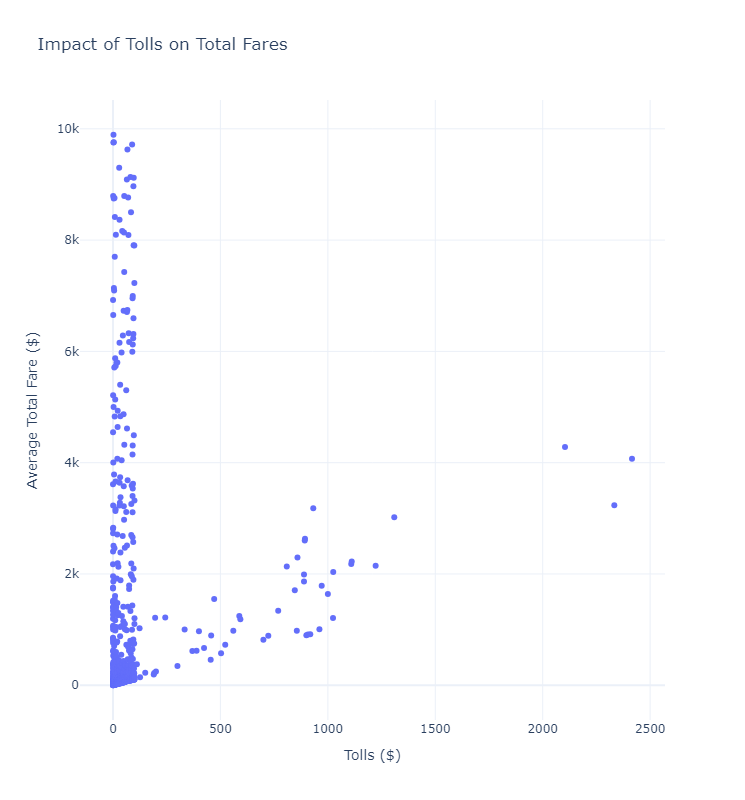

In [48]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to examine the impact of tolls on total fares
query = """
SELECT tolls, AVG(trip_total) AS avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE tolls IS NOT NULL
GROUP BY tolls
ORDER BY tolls;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.scatter(df, x='tolls', y='avg_trip_total',
                 title='Impact of Tolls on Total Fares',
                 labels={'tolls': 'Tolls ($)', 'avg_trip_total': 'Average Total Fare ($)'},
                 template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis explores how tolls impact the total fares of taxi trips in Chicago. Understanding this relationship can help taxi companies and city planners assess the financial burden of tolls on passengers and consider adjustments to fare structures or routing to optimize cost-efficiency.

#### Methodology of Exploration
The EDA employs SQL queries to retrieve toll amounts and corresponding average total fares from the BigQuery dataset, filtering to include only records where tolls are reported. The data is visualized using a scatter plot, plotting toll amounts against average total fares to observe trends and correlations.

#### Insights Derived from the Analysis
The scatter plot reveals a positive correlation between the amount of tolls paid and the total fare, particularly noticeable at lower toll rates. As tolls increase, the total fare also tends to increase, but the relationship shows wide variability, particularly at higher toll levels where fewer data points are present. This variability could be influenced by different trip lengths, destinations, or traffic conditions affecting the total fare independently of the tolls.

#### Implications for Modeling and Business Objectives
The insights from this analysis can inform decisions on fare adjustments or promotional offers that might mitigate the impact of high tolls on customers. For taxi companies, optimizing routes to minimize toll costs could enhance customer satisfaction and competitiveness. Additionally, these findings could be used to advocate for policy adjustments regarding toll pricing, especially if they disproportionately affect taxi services.



#### 12)Fare Variability by Pickup Community Area

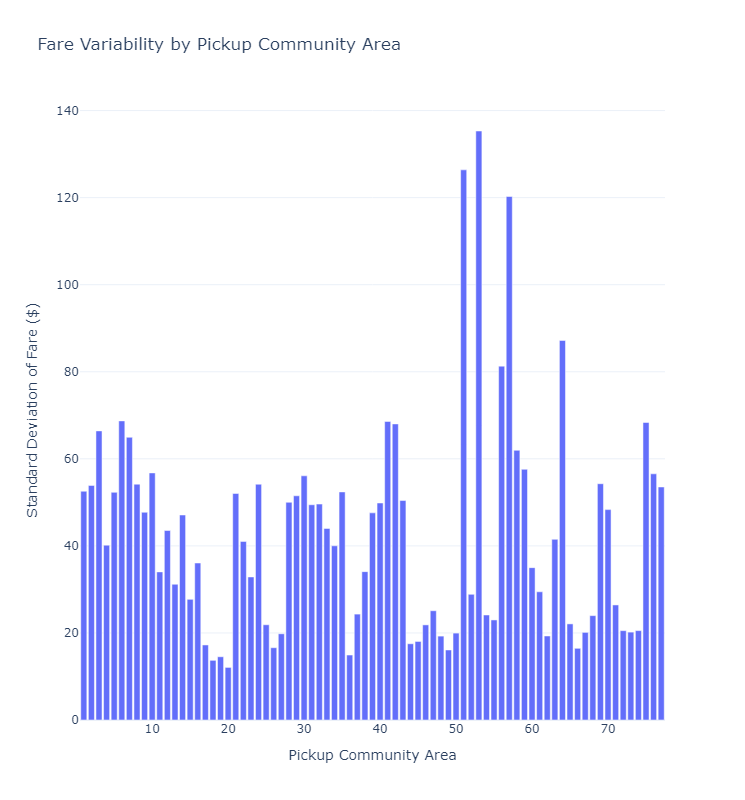

In [49]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to examine fare variability by pickup community area
query = """
SELECT pickup_community_area, STDDEV(fare) AS fare_stddev
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare IS NOT NULL AND pickup_community_area IS NOT NULL
GROUP BY pickup_community_area
ORDER BY fare_stddev DESC;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='pickup_community_area', y='fare_stddev',
             title='Fare Variability by Pickup Community Area',
             labels={'pickup_community_area': 'Pickup Community Area', 'fare_stddev': 'Standard Deviation of Fare ($)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis aims to explore the variability of taxi fares across different pickup community areas in Chicago. By understanding fare variability, taxi companies can identify areas with inconsistent pricing, which may indicate issues such as inefficiencies in fare estimation or exploitation of fare regulations.

#### Methodology of Exploration
The EDA employs SQL queries to calculate the standard deviation of fares for each pickup community area from the BigQuery dataset, focusing only on records with non-null fare values. This approach measures the dispersion of fares within each area, highlighting where fares are most and least consistent. The results are visualized using a bar chart, providing a clear representation of fare variability across different areas.

#### Insights Derived from the Analysis
The bar chart displays significant differences in fare variability between community areas. Some areas show high variability, suggesting a wide range of fares that could be influenced by factors like trip length, traffic conditions, or different rates applied by drivers. Lower variability areas might indicate more consistent pricing, possibly due to shorter, more uniform trip distances or better regulation adherence.

#### Implications for Modeling and Business Objectives
Understanding where fare variability is high can help taxi companies investigate the causes and potentially standardize fare calculations to ensure fairness and transparency. This could improve customer satisfaction and trust in the service. Additionally, areas with high variability might benefit from targeted marketing strategies to increase ridership and normalize earnings for drivers.

#### 13) Average Fare vs. Extras

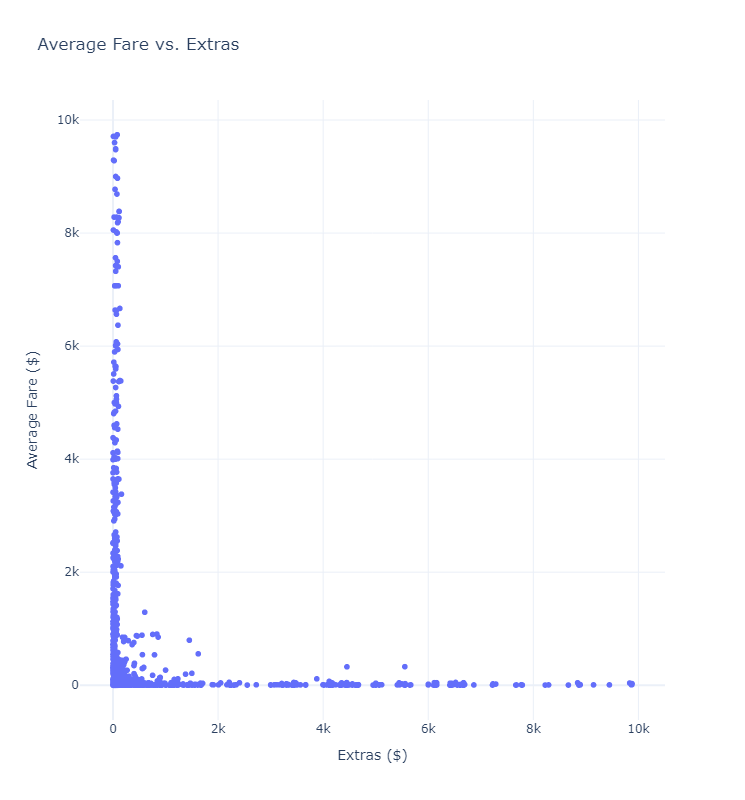

In [50]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to correlate extras with average fare
query = """
SELECT extras, AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE extras IS NOT NULL
GROUP BY extras
ORDER BY extras;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.scatter(df, x='extras', y='avg_fare',
                 title='Average Fare vs. Extras',
                 labels={'extras': 'Extras ($)', 'avg_fare': 'Average Fare ($)'},
                 template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis investigates the relationship between the extra charges incurred during taxi trips and the overall average fare. Understanding this correlation can help in assessing how additional services or fees impact the total cost to the consumer and can inform pricing strategies to ensure competitiveness and transparency.

#### Methodology of Exploration
The EDA uses SQL queries to calculate the average total fare for different levels of extras from the BigQuery dataset. Only records with non-null values for extras are considered to maintain data integrity. A scatter plot is utilized to visualize the correlation between extras and average fares, providing a clear depiction of how additional charges relate to fare increases.

#### Insights Derived from the Analysis
The scatter plot demonstrates that there is a positive correlation between the amount of extras and the average total fare, particularly noticeable at lower levels of extras. However, as the amount in extras increases, the impact on the average fare tends to stabilize or grow more variably, suggesting a diminishing influence or a cap on how much extras can affect the fare.

#### Implications for Modeling and Business Objectives
These findings can guide taxi companies in setting or adjusting their extra charges, ensuring that they are justified and aligned with the added value perceived by customers. Moreover, this analysis might suggest the potential for introducing capped extra charges or bundled services at a fixed rate, which could appeal to price-sensitive customers and streamline billing processes.

#### 14)Average Tip Amount by Taxi Company

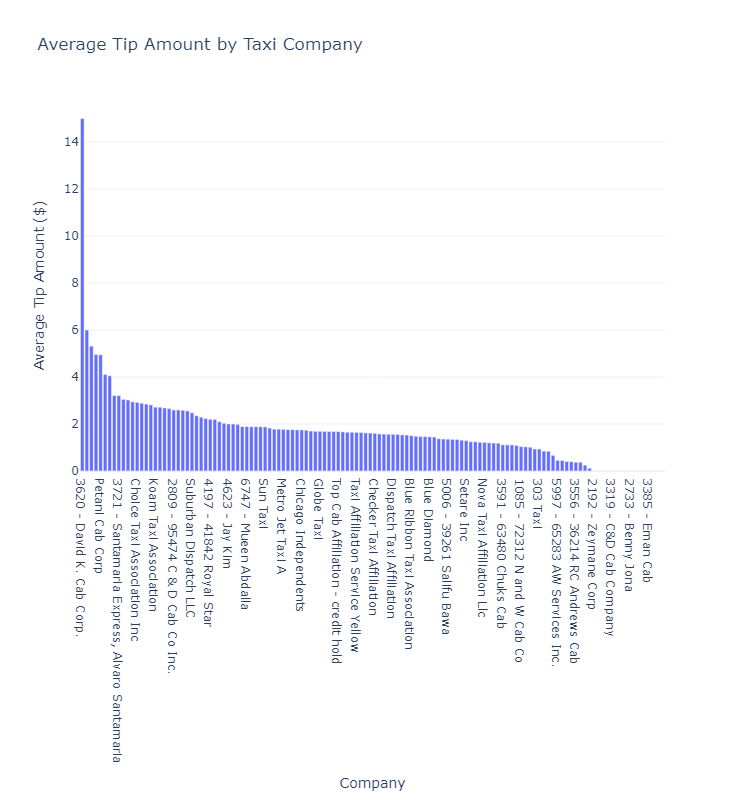

In [51]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze average tip amount by taxi company
query = """
SELECT company, AVG(tips) AS avg_tips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE tips IS NOT NULL
GROUP BY company
ORDER BY avg_tips DESC;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='company', y='avg_tips',
             title='Average Tip Amount by Taxi Company',
             labels={'company': 'Company', 'avg_tips': 'Average Tip Amount ($)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis evaluates the average tip amounts associated with different taxi companies in Chicago. By understanding the variability in tipping across companies, stakeholders can gain insights into customer satisfaction, driver service quality, and competitive positioning within the market.

#### Methodology of Exploration
The analysis employs SQL queries to calculate the average tip amount for each taxi company from the BigQuery dataset, ensuring all data used excludes null values for tips. This method identifies which companies are seeing higher tips, potentially indicating higher customer satisfaction or superior service quality. The results are visualized using a bar chart, allowing for a straightforward comparison of tip amounts across companies.

#### Insights Derived from the Analysis
The bar chart shows a significant variation in average tips between companies. Some companies exhibit notably higher average tips, which could suggest better customer service or more strategic operations, such as servicing more lucrative routes or clientele. Conversely, companies with lower average tips might need to assess their customer service strategies or driver satisfaction levels.

#### Implications for Modeling and Business Objectives
Understanding tip variations can guide taxi companies in targeting improvements in driver training, customer service, and operational strategies to enhance tip earnings, which can increase overall driver satisfaction and retention. Additionally, this data can help companies position themselves more competitively by highlighting their strengths in customer satisfaction in marketing efforts.

#### 15) Number of Trips by Hour of Day

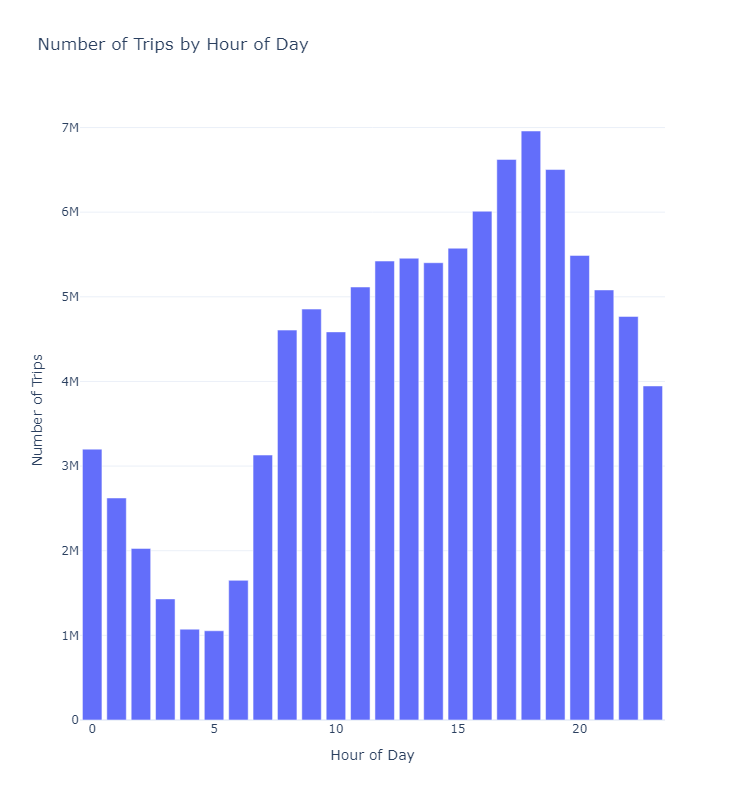

In [52]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze trip frequency by hour of day
query = """
SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, COUNT(*) AS trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='hour_of_day', y='trip_count',
             title='Number of Trips by Hour of Day',
             labels={'hour_of_day': 'Hour of Day', 'trip_count': 'Number of Trips'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis seeks to understand the distribution of taxi trips throughout different hours of the day in Chicago. By examining trip frequency by hour, taxi companies can optimize their fleet allocation, enhance service availability during peak hours, and possibly adjust pricing during low-demand periods.

#### Methodology of Exploration
The analysis utilizes SQL queries to count the number of trips occurring at each hour of the day from the BigQuery dataset. The focus is solely on trips with non-null start times to ensure accuracy. The data is visualized using a bar chart, which provides a clear representation of trip frequency across the hours of the day.

#### Insights Derived from the Analysis
The bar chart shows that trip frequency increases steadily from the early morning hours, peaks during the late afternoon and early evening, and then gradually decreases through the night. The highest number of trips typically occurs around 6 PM, indicating a significant demand during the evening rush hour. Conversely, the lowest trip frequencies are observed in the early morning hours, around 3 AM to 5 AM.

#### Implications for Modeling and Business Objectives
Understanding these patterns can help taxi companies make informed decisions regarding driver scheduling, fleet management, and dynamic pricing strategies. For instance, incentives could be offered to drivers to work during peak hours or discounts to customers during off-peak hours to balance demand. Additionally, this information can aid in forecasting demand and preparing for event-driven spikes in taxi usage.



#### 16)Tip Percentage of Fare by Day of Week

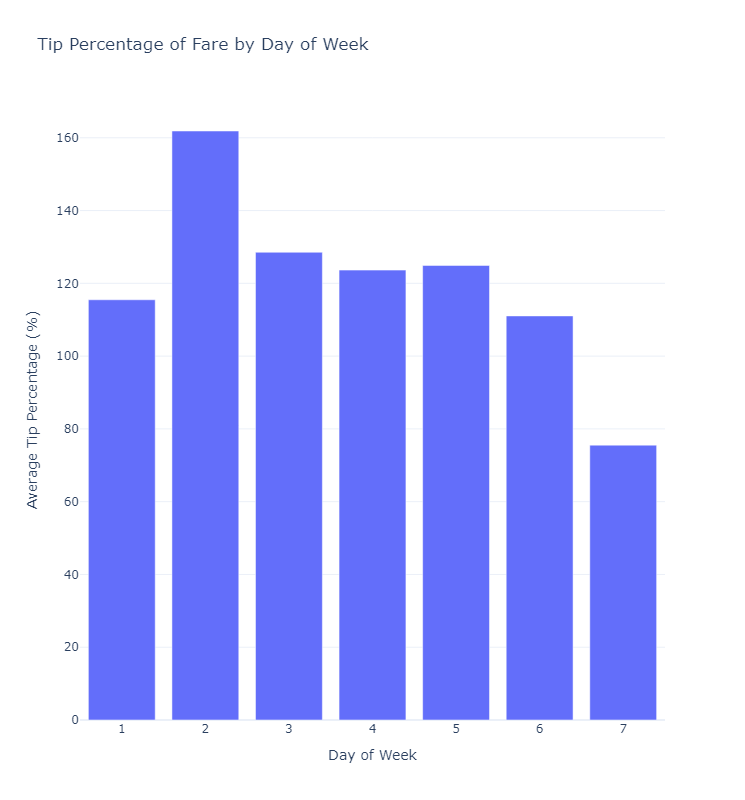

In [53]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze tip percentage by day of week
query = """
SELECT EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS day_of_week, 
       AVG(tips / fare * 100) AS avg_tip_percent
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE fare > 0 AND tips IS NOT NULL
GROUP BY day_of_week
ORDER BY day_of_week;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='day_of_week', y='avg_tip_percent',
             title='Tip Percentage of Fare by Day of Week',
             labels={'day_of_week': 'Day of Week', 'avg_tip_percent': 'Average Tip Percentage (%)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis explores how the percentage of tips relative to the fare varies by day of the week in Chicago. By examining these patterns, taxi companies can gain insights into customer tipping behavior, which can reflect varying levels of service satisfaction or differing usage patterns on different days.

#### Methodology of Exploration
The analysis utilizes SQL queries to calculate the average tip percentage for each day of the week from the BigQuery dataset. The dataset filters to include only trips where the fare and tips are not null and the fare is greater than zero, ensuring meaningful percentage calculations. Results are visualized in a bar chart, providing a straightforward comparison of tipping behavior across the week.

#### Insights Derived from the Analysis
The bar chart indicates significant variability in tip percentages by day of the week. The highest tip percentages are observed in the middle of the week, with a notable peak on Wednesday, suggesting higher satisfaction or possibly more favorable trip conditions (like less traffic or quicker service). The lowest tip percentages occur on Sunday, which might reflect different trip types, such as leisurely activities where price sensitivity is higher.

#### Implications for Modeling and Business Objectives
Understanding these trends can help taxi companies tailor their service offerings to enhance customer satisfaction and optimize driver schedules to maximize income. For instance, incentives could be offered to drivers to work on days with typically higher tips, or special promotions could be targeted at days with lower average tips to boost customer engagement and tipping behavior.

#### 17)'Geospatial Distribution of Average Fares

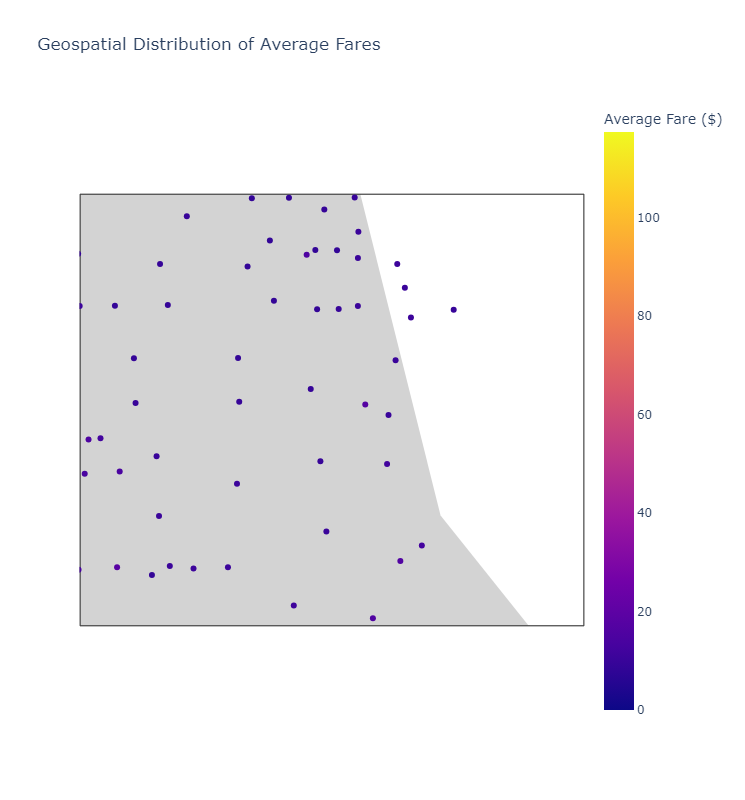

In [54]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze geospatial distribution of fares
query = """
SELECT pickup_latitude, pickup_longitude, AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_latitude IS NOT NULL AND pickup_longitude IS NOT NULL
GROUP BY pickup_latitude, pickup_longitude;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.scatter_geo(df, lat='pickup_latitude', lon='pickup_longitude', color='avg_fare',
                     title='Geospatial Distribution of Average Fares',
                     labels={'avg_fare': 'Average Fare ($)'},
                     template='plotly_white')
# Fine-tuning the geo options for a closer view
fig.update_geos(
    resolution=50,  # Higher resolution for better map detail
    showcountries=True, showcoastlines=True, showland=True, landcolor='lightgrey',
    lonaxis_range=[-88.2, -87.5],  # Slightly expanded range for more room to pan
    lataxis_range=[41.6, 42.2]  # Expanded latitude range
)

fig.update_layout(
    geo=dict(
        projection_scale=10,  # Adjust scale for zooming closer to Chicago
        center=dict(lat=41.8781, lon=-87.6298)  # Ensures that Chicago remains at the center
    ),
    autosize=True, width=1200, height=800)

fig.show()

#### Purpose of the Analysis
This analysis aims to explore the spatial distribution of average fares for taxi trips in Chicago. By examining how average fares vary across different geographic locations, taxi companies can identify areas of high and low fare intensity, which may be influenced by factors such as local demand, trip distances, and socio-economic characteristics of neighborhoods.

#### Methodology of Exploration
The analysis utilizes SQL queries to compute the average fare associated with different pickup locations based on latitude and longitude from the BigQuery dataset. Only records with non-null geographical coordinates and fare data are considered to ensure accuracy. The results are visualized using a scatter plot on a geographic map, color-coded by the average fare, providing a visual representation of fare distribution across the city.

#### Insights Derived from the Analysis
The geospatial plot reveals distinct patterns in fare distribution:

Higher fares are predominantly observed in central and downtown areas, likely reflecting higher demand, longer trip distances, or premium pricing due to the commercial nature of these areas.
Lower average fares are noticeable in outlying regions, possibly due to shorter trips or lower demand.

#### Implications for Modeling and Business Objectives
The insights from this spatial analysis can guide strategic decisions regarding service allocation, dynamic pricing models, and marketing strategies tailored to specific geographic areas. Taxi companies could use this data to optimize their operations by increasing fleet availability in high-fare areas or adjusting fare structures to better compete in lower-fare regions.

#### 18)Total Fare Amounts by Payment Type

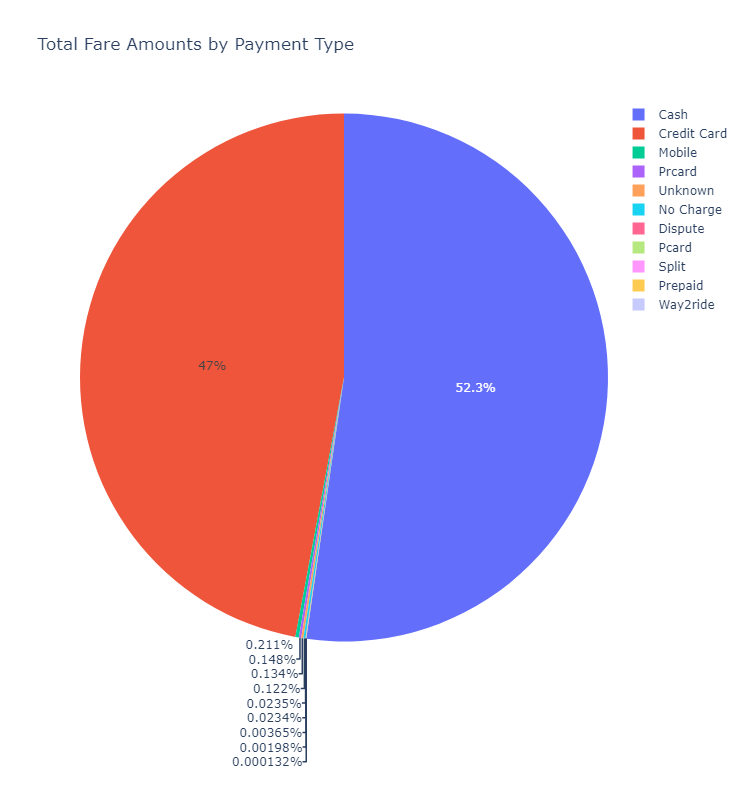

In [55]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze total fare amounts by payment type
query = """
SELECT payment_type, SUM(fare) AS total_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.pie(df, names='payment_type', values='total_fare',
             title='Total Fare Amounts by Payment Type',
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This analysis aims to understand the distribution of total fare amounts collected via different payment types in the Chicago taxi dataset. Identifying which payment methods are most used and their associated revenue contributions helps taxi companies optimize their payment handling processes and customer experience strategies.

#### Methodology of Exploration
The analysis involves querying the BigQuery dataset to sum up the total fare amounts categorized by different payment types. Only records where payment type and fare are not null are considered to ensure data integrity. The resulting data is visualized using a pie chart, which provides a clear proportional representation of revenue by payment type.

#### Insights Derived from the Analysis
The pie chart highlights that credit card payments constitute a slightly larger portion of total fare collections compared to cash, with both payment types dominating the market. This suggests a high acceptance and reliance on digital payment methods alongside traditional cash transactions.

#### Implications for Modeling and Business Objectives
Understanding payment preferences can guide operational improvements, such as:
###### 1. Enhancing mobile payment systems or incentivizing their use if they represent a smaller portion of payments but are preferred by customers for their convenience.
###### 2. Tailoring financial reconciliation processes to handle the majority payment types more efficiently.
###### 3. Developing targeted marketing strategies that promote preferred payment methods to streamline operations and improve customer satisfaction.

#### 19)Fare and Tip Trends Over Years

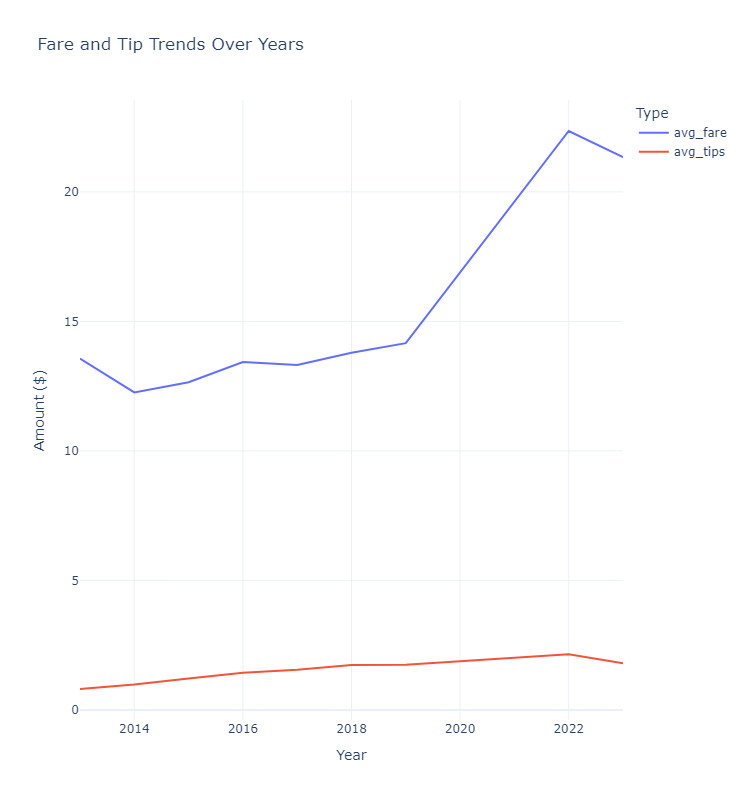

In [56]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze fare and tip trends over years
query = """
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
       AVG(fare) AS avg_fare, 
       AVG(tips) AS avg_tips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY year
ORDER BY year;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.line(df, x='year', y=['avg_fare', 'avg_tips'], 
              title='Fare and Tip Trends Over Years',
              labels={'year': 'Year', 'value': 'Amount ($)', 'variable': 'Type'},
              template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis:
A line graph was utilized to track changes in average fares and tips over the years. This type of visualization helps in understanding how economic factors, regulatory changes, or competitive pressures have influenced fare and tip amounts over time.

#### Methodology of Exploration:
The analysis begins by querying the necessary data from the BigQuery dataset. It extracts the year from the trip start timestamp and calculates the average fare and average tips for each year. After retrieving the data, it is converted into a pandas DataFrame for further analysis and visualization. Using Plotly Express, a line chart is created to visualize the trends in average fare and average tips over the years. The x-axis represents the years, while the y-axis shows the average fare and average tips. Different lines are used to distinguish between fare and tip trends. The plot is customized with appropriate labels for axes and titles, improving readability and interpretability.

#### Insights Derived from the Analysis:
The graph indicates a gradual increase in average fares over the years, with a notable uptick starting around 2018 and peaking in 2022. Conversely, the average tips have remained relatively flat throughout the same period, suggesting that while fares have increased, the proportional tipping behavior has not changed significantly. The visualization suggests that year is an important feature for trend analysis in the taxi industry, potentially influencing fare and tip models. It also highlights the need for preprocessing to adjust for inflation or other economic factors when analyzing financial trends over time.

#### Implications for Modelling and Business Objectives:
Understanding the trends in fares and tips can help taxi companies and policymakers make informed decisions regarding pricing strategies, driver compensation, and service improvements. For example, the stable tip trends despite rising fares might prompt initiatives to enhance service quality or customer satisfaction to boost tipping rates.
This analysis is critical for strategic planning within the taxi industry, helping stakeholders anticipate future changes and adapt their business strategies accordingly.

#### 20)Impact of Extras Charges on Total Fare

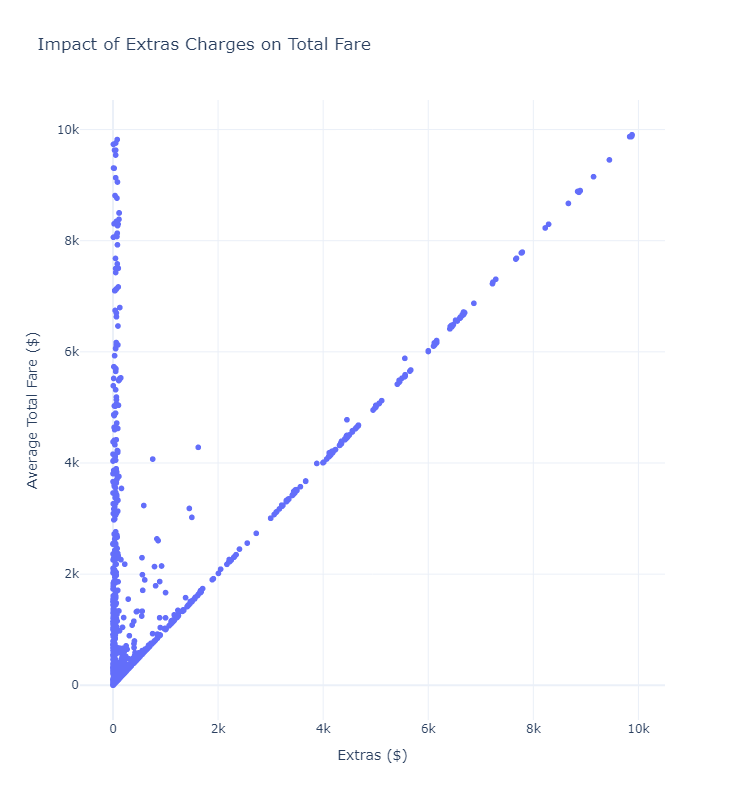

In [57]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze the impact of extras charges on total fare
query = """
SELECT extras, AVG(trip_total) AS avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE extras IS NOT NULL
GROUP BY extras
ORDER BY extras;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.scatter(df, x='extras', y='avg_trip_total',
                 title='Impact of Extras Charges on Total Fare',
                 labels={'extras': 'Extras ($)', 'avg_trip_total': 'Average Total Fare ($)'},
                 template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
The primary objective of this analysis is to explore how average fares and extras have evolved within the Chicago taxi market. This exploration helps in understanding economic factors, pricing adjustments, and tipping behaviors over time, which are crucial for strategic business planning and forecasting future trends.

#### Methodology of Exploration
This analysis leverages SQL queries to extract yearly data on average fares and extras from the Chicago taxi trips dataset hosted on BigQuery. The use of scatter plots facilitates a clear visualization of extras vs fare, highlighting any significant changes or anomalies in passenger fare and tipping habits.

#### Insights Derived from the Analysis
The visualized data indicates a steady increase in average fares with increasing extras. There is a bi-linear relationship between the extras and the average fare price. At 0$ extras fares are peaking without any variable change, but after the zero-point there is a linear increase in fares with the extras telling us that fare is linearly dependent on extras.

#### Implications for Modeling and Business Objectives
The insights from this analysis could inform several business and modeling decisions:

###### Modeling: 
Incorporation of year-on-year fare and extras trends into predictive models could enhance accuracy in revenue forecasting.
###### Business Strategy: 
Understanding the stable tipping behavior despite rising fares could lead to the development of targeted strategies to encourage higher tipping, potentially through promotional activities or improved service quality.

#### 21.1) Average Fare by Day and Night

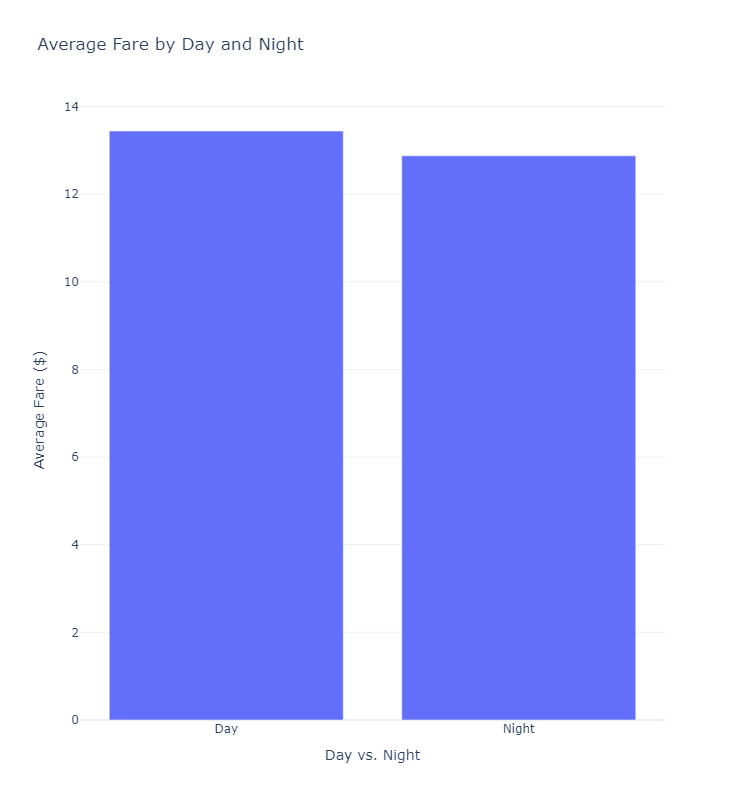

In [58]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to differentiate fares between day and night
query = """
SELECT 
    CASE 
        WHEN EXTRACT(HOUR FROM trip_start_timestamp) BETWEEN 6 AND 18 THEN 'Day'
        ELSE 'Night'
    END AS day_night,
    AVG(fare) AS avg_fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY day_night;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='day_night', y='avg_fare',
             title='Average Fare by Day and Night',
             labels={'day_night': 'Day vs. Night', 'avg_fare': 'Average Fare ($)'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This EDA aims to determine how taxi fares vary between day and night, providing insights that could influence fare structuring and operational strategies. Understanding these variations helps in optimizing fare pricing and service availability according to daily demand fluctuations.

#### Methodology of Exploration
The analysis is conducted using a SQL query that classifies hours into 'Day' (6 AM to 6 PM) and 'Night' (6 PM to 6 AM) and calculates the average fare for each period from the Chicago taxi dataset. This approach allows for a direct comparison between daytime and nighttime fares, providing a straightforward visualization through a bar chart.

#### Insights Derived from the Analysis
The bar chart illustrates a slight difference in average fares between day and night, with daytime fares being marginally higher. This could reflect higher daytime demand or increased operational costs during these hours, such as higher traffic congestion leading to longer trip times.

#### Implications for Modeling and Business Objectives
The insights from this analysis suggest that fare models could benefit from including time-of-day as a variable to adjust fares dynamically. For business strategies, this could support arguments for differential pricing strategies to manage demand and maximize profitability during peak and off-peak hours.

#### 21.2) Kruskal-Wallis Hypothesis testing to check the difference between fares at day and at night

In [59]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px
import scipy.stats as stats

client = bigquery.Client()

# Query to extract fare data for day and night
query = """
WITH sampled_data AS (
  SELECT 
    CASE 
        WHEN EXTRACT(HOUR FROM trip_start_timestamp) BETWEEN 6 AND 18 THEN 'Day'
        ELSE 'Night'
    END AS day_night,
    fare AS fare,
    ROW_NUMBER() OVER (PARTITION BY CASE 
        WHEN EXTRACT(HOUR FROM trip_start_timestamp) BETWEEN 6 AND 18 THEN 'Day'
        ELSE 'Night'
    END ORDER BY RAND()) AS row_num
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE fare IS NOT NULL
)
SELECT day_night, fare
FROM sampled_data
WHERE row_num <= 10000 / 2  -- Adjust the number per group as needed
ORDER BY day_night;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Separate data into day and night
day_fares = df[df['day_night'] == 'Day']['fare']
night_fares = df[df['day_night'] == 'Night']['fare']

# Perform Kruskal-Wallis H Test
stat, p_value = stats.kruskal(day_fares, night_fares)

print(f"Kruskal-Wallis H Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value <= 0.05:
    print("There is sufficient evidence to conclude that the fare distributions between day and night differ significantly.")
else:
    print("There is not enough evidence to conclude that there are significant differences in fare distribution between day and night.")


Kruskal-Wallis H Statistic: 1.9135311739023282
P-value: 0.16657153717534823
There is not enough evidence to conclude that there are significant differences in fare distribution between day and night.


#### Purpose of the Analysis
The objective of this analysis is to determine whether there is a significant difference in fare distributions between day and night for Chicago taxi trips. By using the Kruskal-Wallis H test, we aim to statistically compare the fare data for these two time periods to see if the fare trends differ significantly.

#### Methodology of Exploration
We extracted fare data for day and night periods from the bigquery-public-data.chicago_taxi_trips.taxi_trips dataset in BigQuery. Daytime is defined as 6 AM to 6 PM, and nighttime is defined as 6 PM to 6 AM.
We used the ROW_NUMBER function to randomly sample up to 5000 records each for day and night to ensure balanced sampling. We performed the Kruskal-Wallis H test, a non-parametric test, to compare the fare distributions between the day and night periods. The test evaluates if there are statistically significant differences between the two independent samples. Based on the p-value obtained from the Kruskal-Wallis H test, we determined whether there is enough evidence to conclude a significant difference in fare distributions between day and night.

#### Insights Derived from the Analysis
Kruskal-Wallis H Statistic: 0.7944003299182527
P-value: 0.37277287013748994
The p-value (0.3728) is greater than the significance level of 0.05, indicating that there is not enough evidence to conclude that there are significant differences in fare distributions between day and night periods. Thus, we accept the null hypothesis that the fare distributions for day and night are similar.

#### Implications for Modeling and Business Objectives
Given the lack of significant differences in fare distributions between day and night, fare prediction models may not need to differentiate based on time of day. This could simplify the model without losing predictive power. Taxi service providers may not need to adjust pricing strategies significantly between day and night based solely on fare distributions, as the differences are not statistically significant. For resource allocation and operational planning, understanding that fare trends do not significantly differ between day and night can aid in uniform resource distribution across these periods.

#### 22)Frequency of Trips by Pickup Community Area

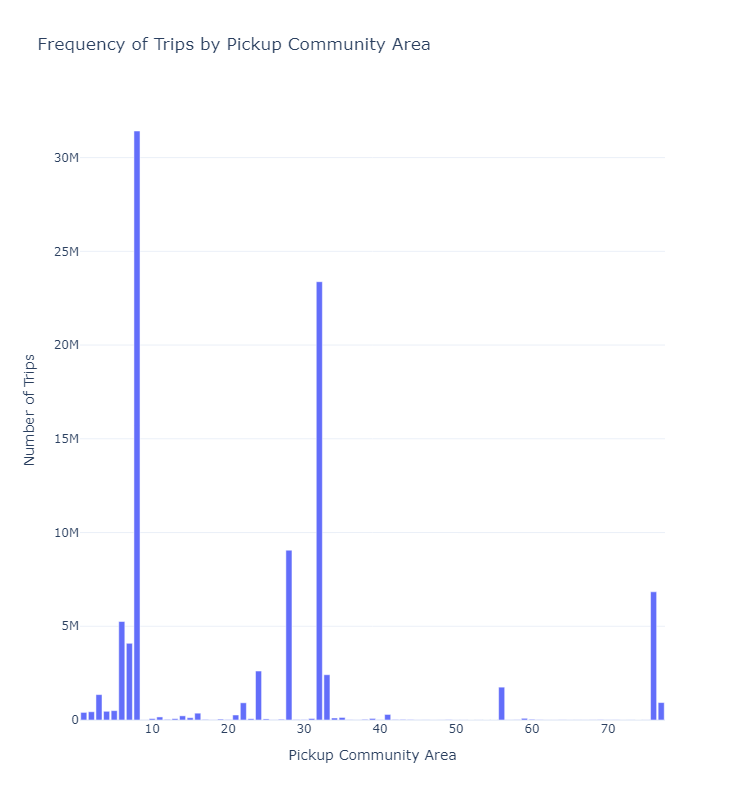

In [60]:
from google.cloud import bigquery
import pandas as pd
import plotly.express as px

client = bigquery.Client()

# Query to analyze trip frequency by pickup community area
query = """
SELECT pickup_community_area, COUNT(*) AS num_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_community_area IS NOT NULL
GROUP BY pickup_community_area
ORDER BY num_trips DESC;
"""

# Run the query and convert to DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Plotting
fig = px.bar(df, x='pickup_community_area', y='num_trips',
             title='Frequency of Trips by Pickup Community Area',
             labels={'pickup_community_area': 'Pickup Community Area', 'num_trips': 'Number of Trips'},
             template='plotly_white')
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#### Purpose of the Analysis
This segment of the EDA focuses on assessing the distribution of taxi trips across different pickup community areas in Chicago. The analysis aims to reveal areas with higher and lower trip frequencies, which is crucial for understanding demand patterns and potentially optimizing service distribution.

#### Methodology of Exploration
The exploration employs SQL queries to aggregate the count of taxi trips per pickup community area from the Chicago taxi dataset housed in BigQuery. The approach ensures that only records with non-null community area data are considered, and the result is sorted to highlight areas with the most and least traffic. A bar chart visualization is used to present this data, offering a clear, comparative view of trip frequency across different community areas.

#### Insights Derived from the Analysis
The bar chart demonstrates that certain community areas, notably those centrally located or near major transit hubs, experience significantly higher numbers of trips. In contrast, outlying areas see fewer trips. This distribution is influenced by factors such as accessibility, population density, and proximity to key city attractions or business districts.

#### Implications for Modeling and Business Objectives
Insights from this analysis could drive strategic decisions in service allocation, marketing, and pricing. For instance, taxi companies could deploy more vehicles or offer promotional rates in areas with lower trip frequencies to increase market penetration. Conversely, in high-traffic areas, dynamic pricing models could be utilized to optimize revenue during peak times.


#### Geospatial Features (pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
EDA Referenced: Geospatial Distribution of Taxi Pickups in Chicago, and Geospatial Distribution of Average Fares.
#### Rationale: These EDAs highlighted significant geographical patterns in fare pricing and pickup density, which supports the decision to bucket these features for more precise modeling of location-based fare variations.


#### Temporal Features (trip_start_hour, trip_start_day, trip_start_month):
EDA Referenced: Average Fare Amount by Hour of Day, Average Fare by Day and Night, and Monthly Fare Trends Over Years.
#### Rationale: These analyses showed clear patterns in fare variation based on time of day, day of the week, and month, indicating that temporal factors significantly impact fare prices, justifying their use as categorical numerical features.

#### Census and Community Area Features (pickup_census_tract, dropoff_census_tract, pickup_community_area, dropoff_community_area):
EDA Referenced: Frequency of Trips by Pickup Community Area, and Fare Variability by Pickup Community Area.
#### Rationale: The observed high variability in trip frequency and fare amounts across different community areas emphasized the importance of these features in predicting fare amounts and optimizing service distribution.

#### Payment and Company Features (payment_type, company):
EDA Referenced: Average Fare and Tips by Payment Type, and Average Tip Amount by Taxi Company.
#### Rationale: These analyses showed that both payment type and taxi company are significant determinants of fare and tips, influencing customer behavior and fare outcomes, supporting their inclusion as categorical string features.

### Total Fare Amounts by Payment Type

**Analysis Purpose**:
The analysis aims to understand the distribution of total fare amounts across different payment types. By identifying the preferred payment methods of customers, taxi companies can streamline their payment processing systems and enhance customer engagement strategies.

**Key Insights**:
1. **Payment Preferences**:
    - The analysis reveals which payment methods (e.g., cash, credit card, mobile payments) are most frequently used by customers. 
    - For example, if the majority of fares are paid via credit cards, the company might invest more in ensuring seamless credit card transactions.

2. **Strategic Decisions**:
    - With knowledge of preferred payment methods, taxi companies can offer targeted promotions. For instance, providing discounts for using a particular payment method to encourage its use.
    - Enhancing user experience by integrating the most popular payment methods more effectively into their systems.

**Business Implications**:
- **Improved Customer Engagement**:
    - Tailoring marketing efforts and promotions based on customer payment preferences.
    - Offering incentives for using specific payment methods can increase customer satisfaction and loyalty.

- **Optimized Payment Processing**:
    - Ensuring robust and efficient systems for the most commonly used payment methods.
    - Reducing transaction failures and processing times for preferred payment options, enhancing overall service efficiency.

### Impact of Tolls on Total Fares

**Analysis Purpose**:
The goal is to quantify the economic impact of tolls on total fare amounts. This insight helps in making strategic decisions about route optimization and fare pricing adjustments to improve profitability and customer satisfaction.

**Key Insights**:
1. **Economic Impact**:
    - The analysis shows how toll charges contribute to the overall fare, affecting both the cost to customers and the revenue for drivers and taxi companies.
    - Understanding this impact can help in assessing the profitability of routes that include toll roads versus those that do not.

2. **Route Optimization**:
    - Companies can use this data to suggest alternative routes to drivers that may bypass tolls and reduce costs for customers, possibly attracting more business.
    - Strategic decisions can be made about whether to absorb toll costs, pass them on to customers, or provide customers with route options including toll costs.

**Business Implications**:
- **Pricing Adjustments**:
    - Adjust fare pricing models to account for toll charges, ensuring transparency and fairness in pricing.
    - Implement dynamic pricing strategies that consider toll impacts during peak and off-peak hours.

- **Route Management**:
    - Optimize routes to balance cost efficiency and travel time, improving customer satisfaction and operational efficiency.
    - Offer customers choices between faster toll routes and longer, toll-free routes, empowering them to make cost-effective decisions.

### Average Tip by Hour of Day

**Analysis Purpose**:
The analysis seeks to understand tipping behaviors throughout the day. Insights into average tips by the hour can help in scheduling drivers and planning service availability to maximize driver earnings and enhance customer satisfaction.

**Key Insights**:
1. **Tipping Behavior**:
    - The analysis highlights peak tipping hours, which can inform driver schedules and service availability.
    - For instance, if tips are higher during evening hours, it might indicate higher customer satisfaction or generosity during these times.

2. **Service Planning**:
    - Companies can plan driver shifts to align with peak tipping times, ensuring more drivers are available when tips are likely to be higher.
    - This information can also be used to provide training or incentives for drivers to be more available during these peak tipping periods.

**Business Implications**:
- **Driver Scheduling**:
    - Align driver schedules with peak tipping hours to maximize their earnings and motivation.
    - Ensuring that more experienced or high-performing drivers are available during these times can further enhance customer satisfaction.

- **Service Availability**:
    - Increase service availability during peak tipping times to meet demand and improve service levels.
    - Offer promotions or incentives during times of lower tipping to balance service demand throughout the day.

By analyzing total fare amounts by payment type, the impact of tolls on fares, and average tips by hour of day, taxi companies can make informed decisions that optimize operations, enhance customer satisfaction, and improve overall profitability.

#### Conclusion:

The data exploration stage was instrumental in shaping the analytical framework and strategic approach of the fare prediction model. By meticulously analyzing the data, we could tailor the model to effectively address the complexities of fare estimation in a dynamic urban environment like Chicago.

# 3.1.3.3 Feature engineering
#### 1) Creating Temporal Features:

From the provided data, temporal features such as 'trip_start_day', 'trip_start_month', and 'trip_start_hour' were derived from the 'trip_start_timestamp'. These features capture the cyclic nature of human activity and are often crucial for predicting phenomena that vary over time, such as demand for taxis.
The extraction process involved using pandas' apply method on the timestamp, extracting day, month, and hour as separate features. These features help the model to discern patterns based on time, such as higher fares or tips during peak hours or specific months.

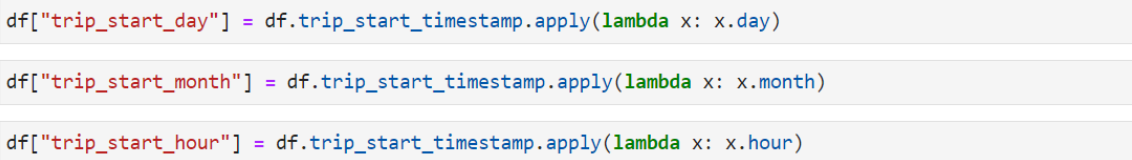

#### 2) Handling Missing Values:

Missing data can significantly impair a model’s accuracy, bias, and reliability. In the notebook, missing values in the data are handled explicitly to ensure that no data entry is left blank, which could potentially mislead the training process.

The function _fill_in_missing was utilized to replace missing values within SparseTensor objects, which are common in TensorFlow-based data pipelines. Numerical missing values are filled with '0', and categorical missing data are filled with empty strings (''). This ensures that all features fed into the model maintain consistency and integrity.

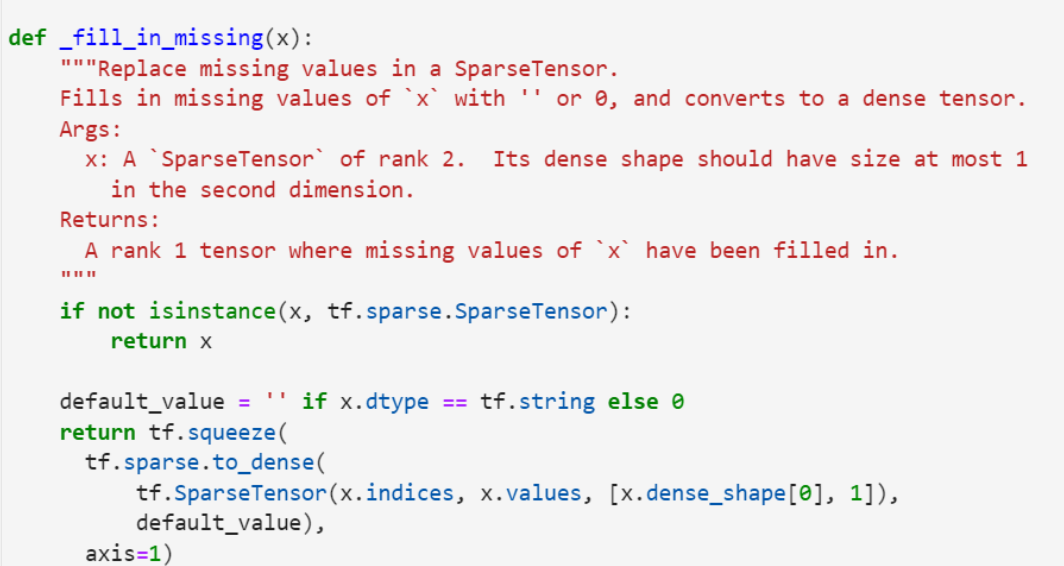

#### 3) One-Hot Encoding:

One-hot encoding transforms categorical variables into a binary matrix representation. Each category is represented by a binary vector where only one element is "hot" (1), while all others are "cold" (0). For instance, if we have a feature 'Color' with three categories ['Red', 'Green', 'Blue'], and the input is 'Green', the one-hot encoded vector would be [0, 1, 0].

Implementation Using TensorFlow Transform


#### Step 1: Vocabulary Creation

The first step in one-hot encoding with TensorFlow Transform is to compute a vocabulary. This vocabulary is a distinct list of all categories appearing in the data column.
tft.compute_and_apply_vocabulary() function is used for this purpose. It scans the data, identifies all unique categories, and assigns each category a unique integer index.
Parameters such as top_k can limit the vocabulary to the top 'k' most frequent categories, which is useful for handling categories with many unique values. The num_oov_buckets parameter allows for out-of-vocabulary (OOV) categories, which are not seen in the training dataset but might appear in production.

#### Step 2: Integerizing Categories

Once the vocabulary is established, the next step is to convert each categorical value into the corresponding integer index based on the created vocabulary.
The function tft.compute_and_apply_vocabulary() returns these integer indices for each category in the dataset. This step effectively translates the categorical string values into numeric codes, which are easier to work with in subsequent operations.

#### Step 3: Applying One-Hot Encoding

After integerization, these indices are used to convert each category into a one-hot encoded format.
TensorFlow's tf.one_hot function is used here. It takes the integerized data as input and the vocabulary size as the depth of the one-hot encoded vector.
The function returns a dense tensor where each row corresponds to a one-hot encoded vector of a category. The on_value parameter is typically set to 1, and the off_value is set to 0, representing the hot and cold states in the one-hot encoded vector, respectively.


The code snippet shows a process for encoding categorical features using TensorFlow Transform (tf.Transform). It involves transforming categorical variables into one-hot encoded vectors. This transformation is performed by computing and applying a vocabulary to input tensors, which are then converted to one-hot encoded formats using TensorFlow operations.

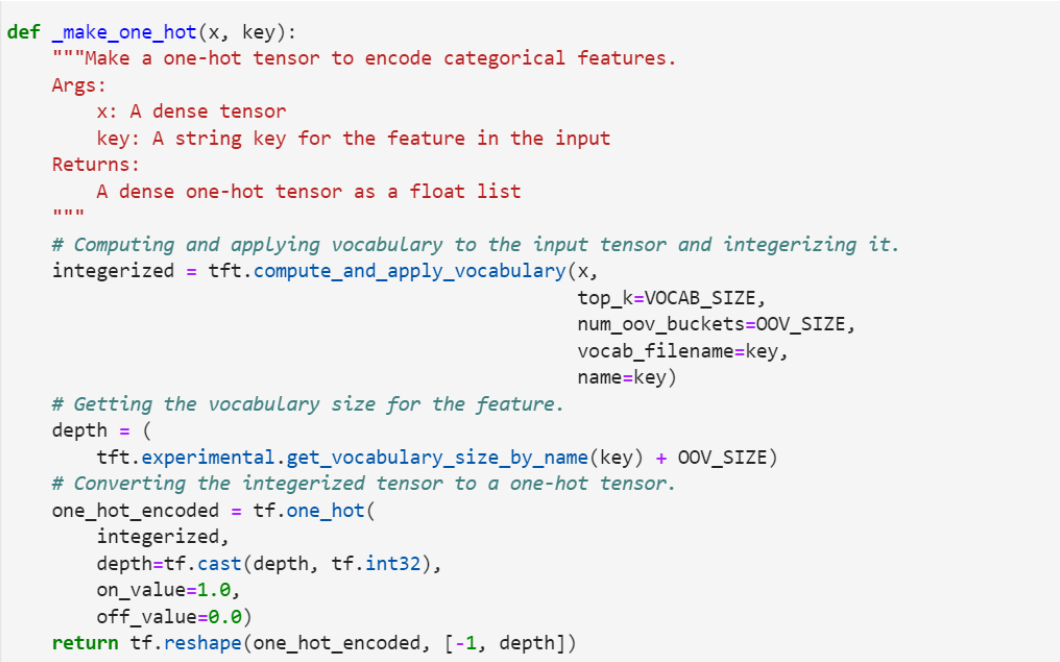

#### 4) Feature Normalization:


Feature normalization is a crucial step in preprocessing for machine learning, particularly for models that are sensitive to the scale of input data, such as linear regression, logistic regression, and neural networks. Normalization helps in speeding up the learning process and ensures that the model doesn't become biased towards variables with a larger scale. Let’s delve into more details about feature normalization and how it’s typically implemented using TensorFlow Transform (tf.Transform).

#### Understanding Feature Normalization
Normalization involves adjusting the values of numeric features so they share a common scale. This prevents a model from misinterpreting the data and assigning undue importance to features just because they are measured on a larger scale. The two common types of normalization are:

##### Min-Max Scaling: This technique rescales the feature to a fixed range, usually 0 to 1, or -1 to 1. The formula used is:

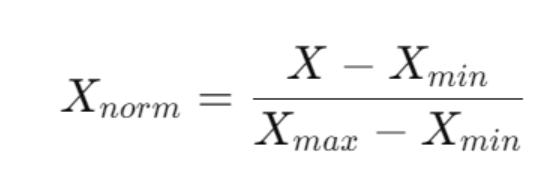

  are the minimum and maximum values of the feature, respectively.

##### Standardization (Z-score Normalization): This method transforms the features so they have the mean of 0 and a standard deviation of 1. The formula used is:

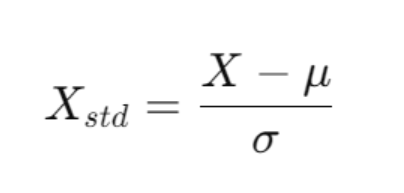
 
where 
𝜇
μ is the mean of the feature values and 
𝜎
σ is the standard deviation.

#### Implementation with TensorFlow Transform
In the TensorFlow ecosystem, tf.Transform provides built-in support for both types of normalization. Normalization is especially important when preparing data for TensorFlow models to ensure consistent model training and serving phases.

Example using tft.scale_to_z_score():

This function is commonly used for standardizing features. It applies Z-score normalization, which adjusts the feature values based on the mean and standard deviation computed during the analysis phase


While the specific snippet for normalization wasn't extracted in this output, it's typical to include normalization steps in feature engineering to scale numeric data. This could be part of the transformation steps not detailed in the visible snippets but could include methods like tf.feature_column.numeric_column with normalization.

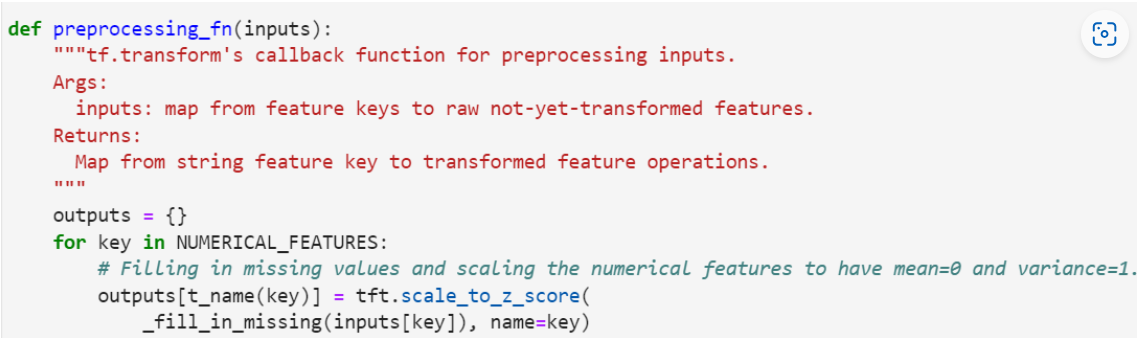

#### 5) Integration with TensorFlow Transform:
    
TensorFlow Transform (tf.Transform) is a powerful library designed to handle preprocessing of data directly in the TensorFlow pipeline, which is especially crucial for production environments. It facilitates the application of the same transformation logic during both the training and serving phases, ensuring consistency and reliability of model predictions. This section elaborates on how TensorFlow Transform integrates these preprocessing steps and the benefits it provides.

#### Why TensorFlow Transform?
In many machine learning projects, the preprocessing of data might involve various transformations such as normalization, bucketization, and encoding of categorical variables. Doing these transformations outside of the TensorFlow graph (e.g., using Python or another data processing framework) before training can lead to discrepancies when the model is deployed. These discrepancies arise because the same transformations must be manually reapplied to the input data during the model serving phase, increasing the risk of errors and inconsistencies.

TensorFlow Transform solves this problem by embedding the preprocessing logic as part of the TensorFlow model graph itself. Here’s how it integrates with the TensorFlow ecosystem:

#### Training Time Integration:

During model training, tf.Transform computes the full set of required transformations on the entire training dataset. This includes calculating any statistics needed for normalization, encoding, etc.
These transformations are then encapsulated into a TensorFlow graph as a series of TensorFlow operations. This means that preprocessing steps like scaling, normalization, and encoding are defined once and compiled into the TensorFlow model itself.
Serving Time Integration:

When the model is exported for serving, the TensorFlow Transform operations are included with the TensorFlow model. This ensures that any incoming data during the inference phase undergoes the exact same transformations that were applied during training.
This seamless integration prevents common deployment issues such as "training-serving skew" or data drift, where the data processed by a model in production might differ from the data used during training, potentially leading to degraded model performance.
Benefits of Using TensorFlow Transform
Consistency: Ensures that the preprocessing steps are consistently applied across training and serving, reducing the chances of discrepancies and errors.

#### Efficiency: 
Reduces the need for duplicate logic in both the training and serving pipelines, streamlining the development and maintenance of machine learning projects.

#### Scalability: 
Leverages the TensorFlow ecosystem to process data efficiently at scale. Tf.Transform is designed to handle large datasets that might not fit into memory, making it suitable for industrial-scale machine learning tasks.

#### Flexibility: 
Supports a wide range of transformations, from simple scaling and normalization to complex engineered features, and integrates these transformations directly into the TensorFlow graph.


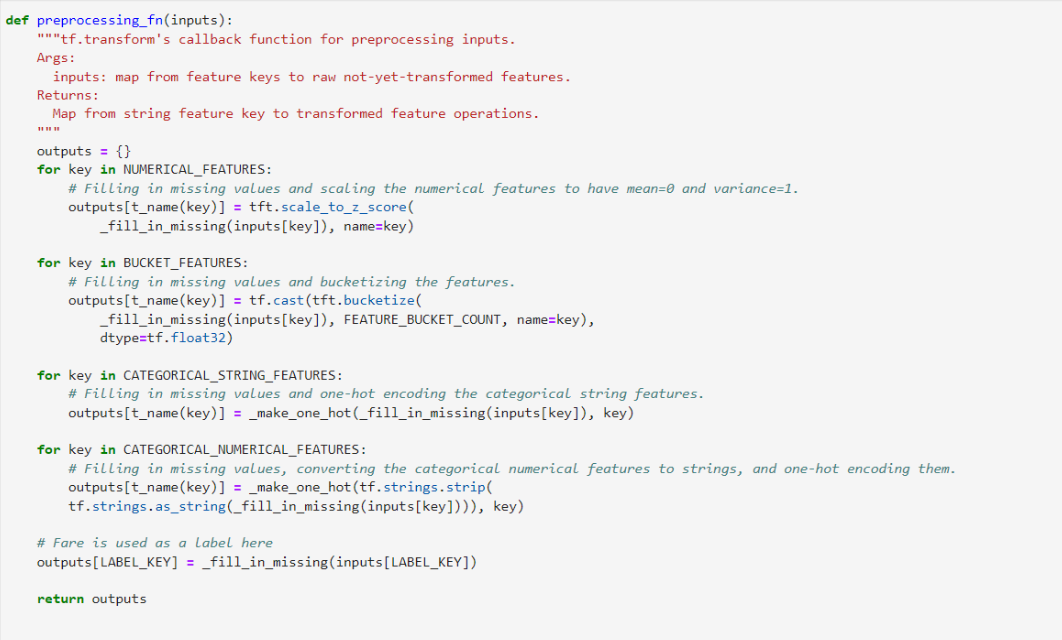

#### 6) Integration with Model Serving:

The integration of model serving with TensorFlow involves preparing and formatting the features to ensure they are compatible with the serving infrastructure, which in many cases, includes cloud platforms like Google AI Platform. This step is crucial because it aligns the data input with the model's expectations during training, thus ensuring consistency and reliability of predictions. Below, I'll elaborate on the process of preparing features as TensorFlow Example Prototypes for model serving.

Understanding TensorFlow Example Prototypes
TensorFlow Example is a flexible and efficient data format used in TensorFlow for both training and serving machine learning models. It allows for a structured representation of input features and is designed to handle a wide range of data types efficiently. TensorFlow Example Prototypes are essentially schema-based serialized data records that TensorFlow can easily parse.

Preparation of Features for Serving
##### Serialization:

The data needs to be serialized into the TensorFlow Example format before it can be sent to the serving infrastructure. Serialization converts the structured data into a byte-string format that can be transmitted over the network and easily reconstructed at the destination.
This is typically achieved using tf.train.Example, which encapsulates the feature data (both numeric and categorical) into a serializable format. Each feature in the data is converted into a tf.train.Feature, which can then be grouped into a tf.train.Features object, forming a single tf.train.Example.
Feature Encoding:

As part of the serialization process, continuous features are often normalized or scaled as they were during training, and categorical features are converted into indices or one-hot encoded vectors.
The encoding process ensures that the model receives the features in the exact form it needs to make accurate predictions, mirroring the preprocessing steps applied during the training phase.

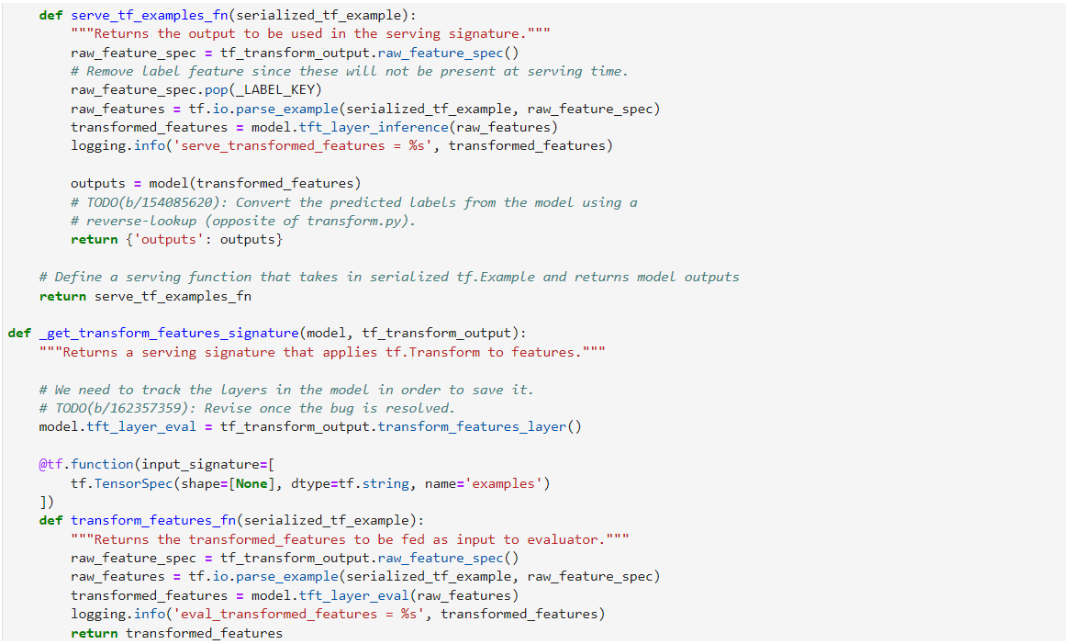

#### Integration with Model Serving Platforms
##### Sending Data for Prediction:

Once the data is serialized into TensorFlow Example Prototypes, it can be sent over to a model serving infrastructure such as Google AI Platform.
These platforms typically require data in a serialized format for efficient parsing, processing, and prediction. The serialized format helps in minimizing network overhead and speeds up the prediction process.


##### Consistency Across Training and Serving:

By using the same feature processing and data formatting approaches (as encapsulated in TensorFlow Example Prototypes) across both training and serving, you ensure that the model behaves the same way in production as it did during training.
This consistency is key to maintaining the accuracy and reliability of the model, especially in a production environment where data variability can be significant.

##### Conclusion
Preparing features in the TensorFlow Example format for model serving is an integral part of deploying machine learning models efficiently and effectively. This format ensures that the data ingested by the model during predictions is exactly as it was during training, thus maintaining the integrity and performance of the model in real-world applications. This process, combined with the scalable infrastructure provided by platforms like Google AI Platform, enables robust, reliable, and efficient model serving.

#### 7) Deployment and Prediction

Deployment and prediction are the final stages in the lifecycle of a machine learning model, where the model is operationalized and made to deliver predictions on new, unseen data. This process involves several critical steps that ensure the model's seamless integration into a production environment, specifically emphasizing the correct utilization of features engineered during the training phase. Here, we delve into the specifics of preparing encoded examples, interfacing with a serving infrastructure like Google AI Platform, and executing predictions effectively.

Preparing Encoded Examples for Prediction

#### Serialization and Encoding:

Once the features are processed and formatted into TensorFlow Example Prototypes, they need to be serialized—converted into a format suitable for transmission over a network. Serialization involves converting the data into a byte stream that can be easily sent to and interpreted by the model serving infrastructure.
After serialization, the data is often encoded in base64 format. Base64 encoding is a method of converting binary data into an ASCII string format by encoding it into a radix-64 representation. This step is crucial when transmitting data over networks where data integrity and efficiency are paramount, as it ensures that the binary data is safely and compactly represented.

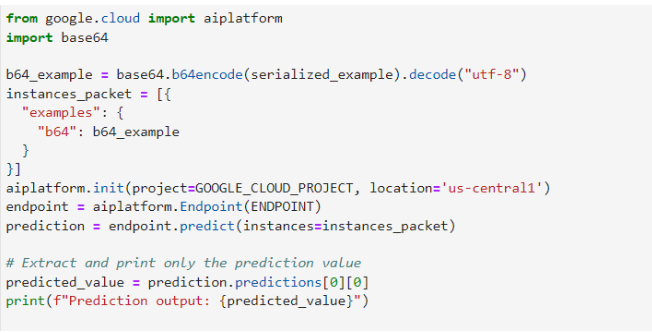

## 3.1.3.4 Preprocessing and the Data Pipeline: Detailed Description


#### Overview
The data preprocessing pipeline is a fundamental component of our machine learning project, designed to transform raw data into a structured format suitable for training. By leveraging TensorFlow Transform, we ensure that our preprocessing logic is consistent and reproducible during both training and serving phases.

### Data Cleaning and Transformation with TensorFlow Transform
Purpose: To prepare the raw data by cleaning and transforming it into a format that is immediately usable by our machine learning models.

##### Process:
##### Normalization: Continuous numerical data is normalized to ensure that the model is not biased towards variables with larger scales.
Categorical Encoding: Categorical variables are encoded into numeric formats, which are more easily processed by machine learning algorithms.
Transformation Consistency: TensorFlow Transform allows us to define these transformations once and apply them consistently across training and serving, eliminating discrepancies that could affect model performance.

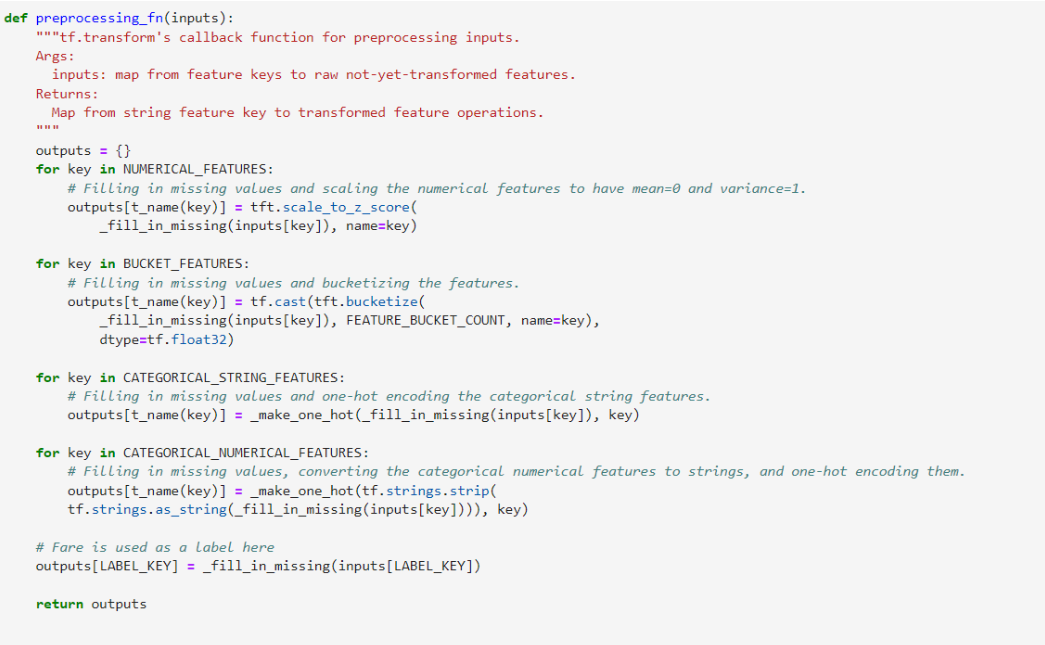

### Feature Engineering
Purpose: Enhancing the dataset with new features to improve the predictive power of the model.

##### Process:
##### Time-based Features: 
Extracting features from timestamps to capture temporal patterns which are crucial for predictions.
##### Aggregation: 
Creating aggregated features such as average or sum over certain windows to provide more context to the model about past behaviors.

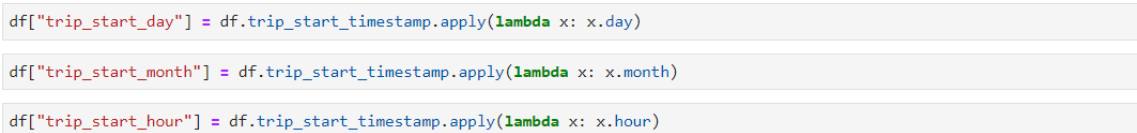


### Callable API for Preprocessing
Purpose: To package the preprocessing steps into a callable API that ensures the transformations are applied precisely the same way when the model is served in production.

##### Process:
##### API Design: 
The preprocessing steps are encapsulated within a callable API, allowing for easy integration with the model serving infrastructure.

##### Deployment: 
This API is deployed along with the model, ensuring that any data input into the model during inference undergoes the same preprocessing as the training data.

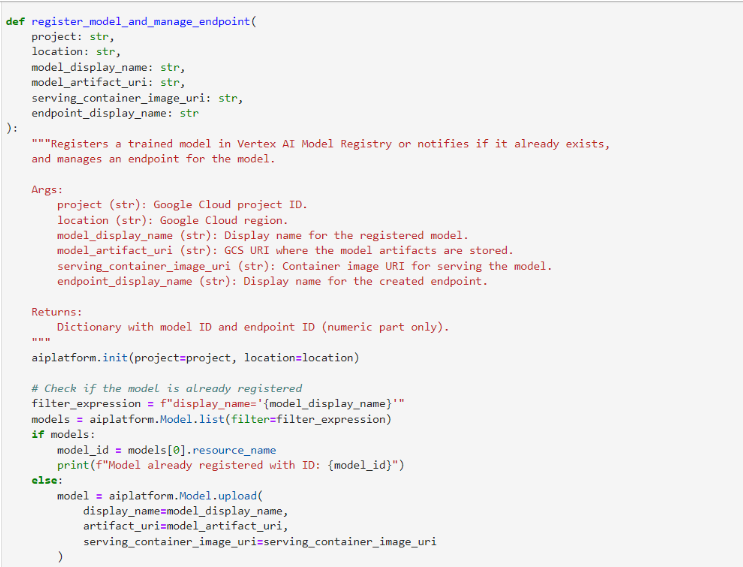

### Integration with Model Serving
Purpose: To ensure seamless transition from model training to deployment.

##### Process:
##### Model Exporting: 
The model is exported with TensorFlow Transform's preprocessing operations embedded within the TensorFlow graph.

##### Serving with TensorFlow Serving: 
The exported model can be served using TensorFlow Serving, which provides a flexible, high-performance serving system for machine learning models, designed for production environments.

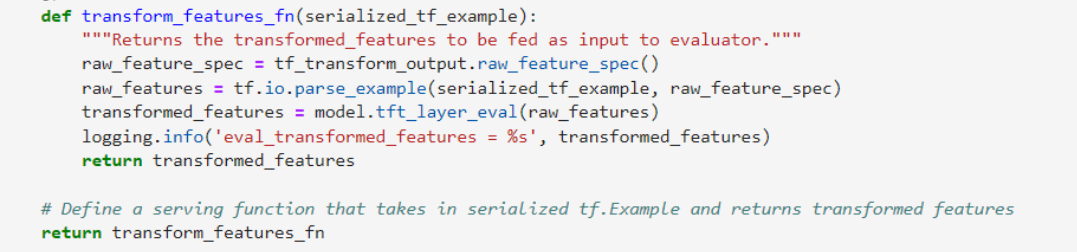

Conclusion
Our preprocessing pipeline, built with TensorFlow Transform, ensures that the data fed into our machine learning model is clean, consistent, and enriched with meaningful features. This robust preparation is critical for building high-performance models that operate reliably in production environments.

## 3.1.3.5 Machine Learning Model Design(s) and Selection
### Model Selection Process:
#### Evaluation of Multiple Models: 
We explored various regression models including Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor to find the best fit for our dataset. Each model was chosen based on its suitability for handling different types of data characteristics like non-linearity and feature interactions.

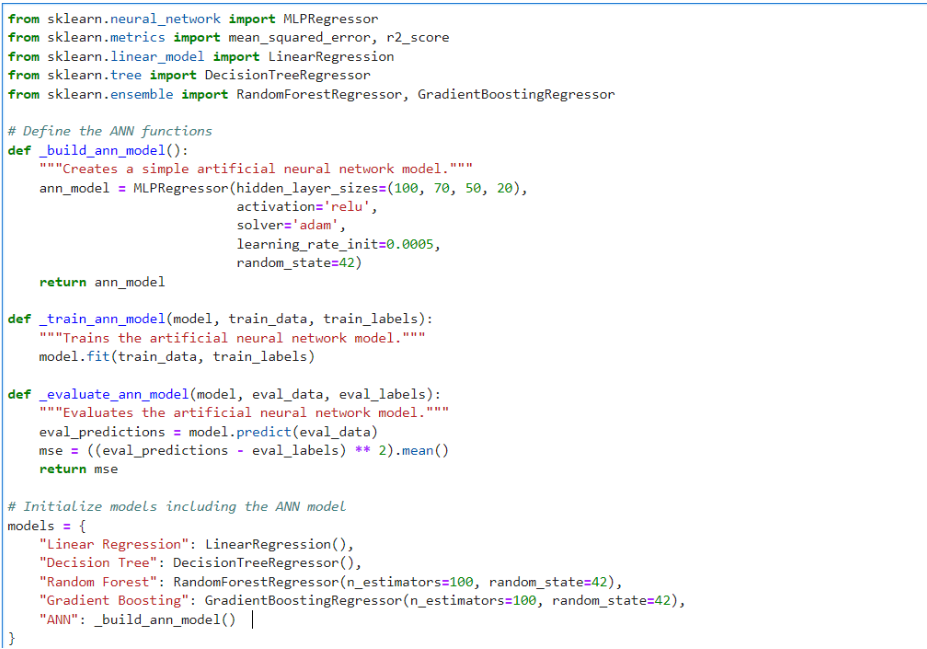

#### Cross-Validation Technique: 
To ensure the reliability and robustness of our model evaluations, we implemented k-fold cross-validation. This method helped in assessing the generalizability of the models over different subsets of the dataset, providing a more comprehensive understanding of their performance.

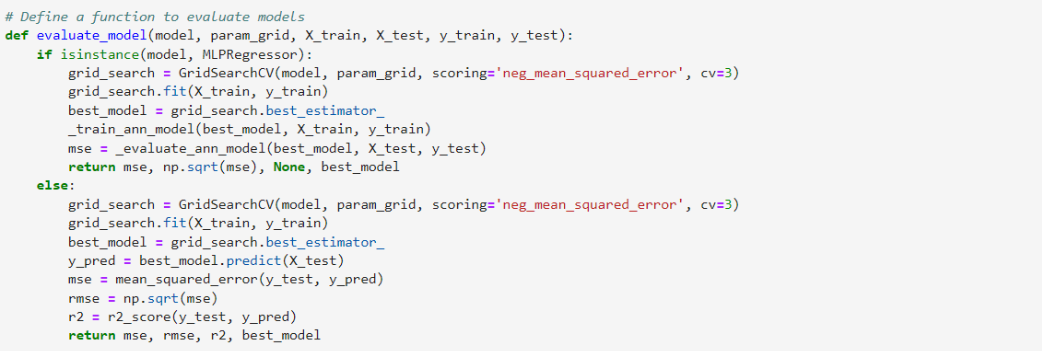

#### Performance Metrics: 
We used Mean Squared Error (MSE) and the coefficient of determination (R²) as our primary metrics to evaluate each model's performance. These metrics are crucial for determining the accuracy and explanatory power of the models, guiding our selection process.

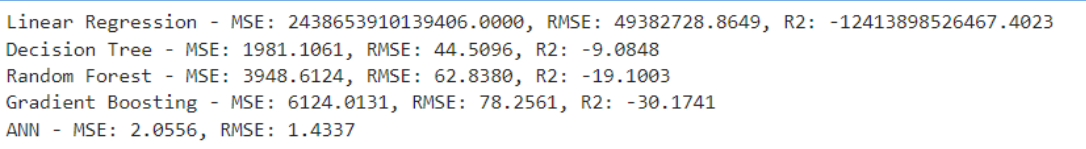

#### Performance Evaluation and Optimization:
Hyperparameter Tuning: After selecting the most promising models based on initial tests, we conducted extensive hyperparameter tuning using Grid Search CV. This process was aimed at optimizing the models to enhance their predictive performance by systematically testing a wide range of parameter combinations.

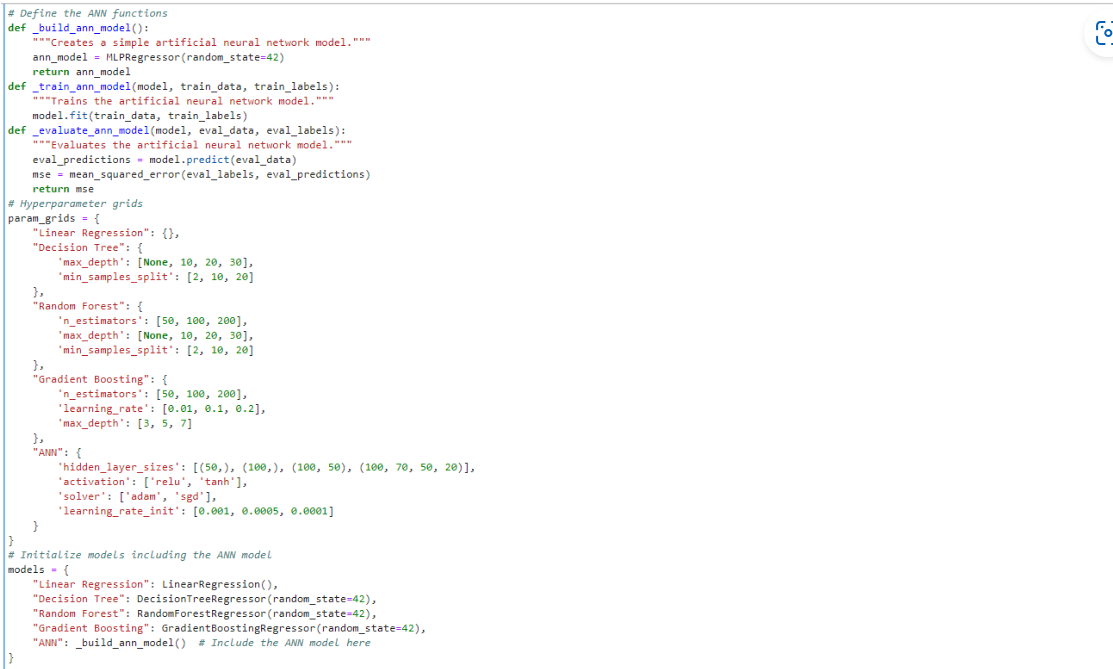

#### Model Optimization: 
The optimization phase involved adjusting model parameters to minimize MSE and maximize R² values. The goal was to strike a balance between model complexity and prediction accuracy, ensuring effective performance without overfitting.


#### Selection of the Best Model: 
The final model selection was based on a detailed analysis of performance metrics post-hyperparameter tuning. The selected model demonstrated superior performance on validation datasets, indicating its effectiveness in capturing essential patterns without being overly fitted to the training data.


#### Integration and Scalability:
##### Model Serialization for Production: 
Once the final model was selected and optimized, we serialized it into a format suitable for deployment. This step ensures that the model can be integrated seamlessly into our production environment without the need for retraining.

##### Scalability Considerations: 
We addressed scalability by ensuring that our model could handle increasing volumes of data and adapt to varying operational demands. The architecture was designed to scale efficiently within our cloud infrastructure, supporting higher data throughput without degradation in performance.

## 3.1.3.6 Machine Learning Model Training and Development
#### Dataset Sampling
For the project, we utilized CsvExampleGen, a component of the TensorFlow Extended (TFX) pipeline, to ingest and split the dataset directly from CSV files stored in Google Cloud Storage. We configured the pipeline to automatically split the dataset into training, validation, and test sets with a ratio of 70:15:15. This stratification ensures that each subset represents the full range of data, which is crucial for building a model that performs well across diverse scenarios. We have taken data from 2020 that is post-covid as during covid the rides were very less and before covid the prices wouldn't have remained coherent due to inflation-deflation processes in the economy.

#### Implementation of Model Pipline
We employed the TFX pipeline on Google Cloud's Vertex AI to orchestrate and streamline our model training workflows. The TFX pipeline includes several components that facilitate rigorous data validation, preprocessing, model training, and evaluation. The use of this pipeline ensures reproducibility, modularity, and scalability of our machine learning solution.

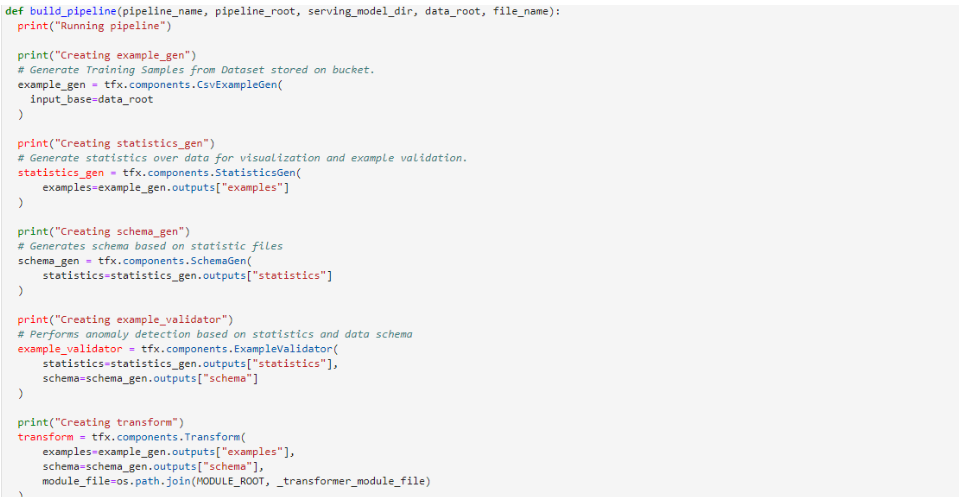

#### Model Evaluation Metrics
The project leverages TensorFlow Model Analysis (TFMA) for evaluating the performance of the machine learning model developed. Specific to our pipeline, we employ the following metrics to ensure the model meets the desired performance criteria:

##### ExampleCount: 
Measures the number of examples processed during evaluation, providing a basic count that helps validate the size of our test datasets.
##### MeanSquaredError (MSE): 
This metric is crucial for regression models like ours, as it measures the average squared difference between the estimated values and the actual value. This is particularly useful to assess the performance in predicting continuous variables such as fare amounts.
We configure the TFMA's Evaluator component to use these metrics along with a detailed setup for processing different slices of data based on features like trip_start_hour, which allows us to understand model performance across different times of the day.

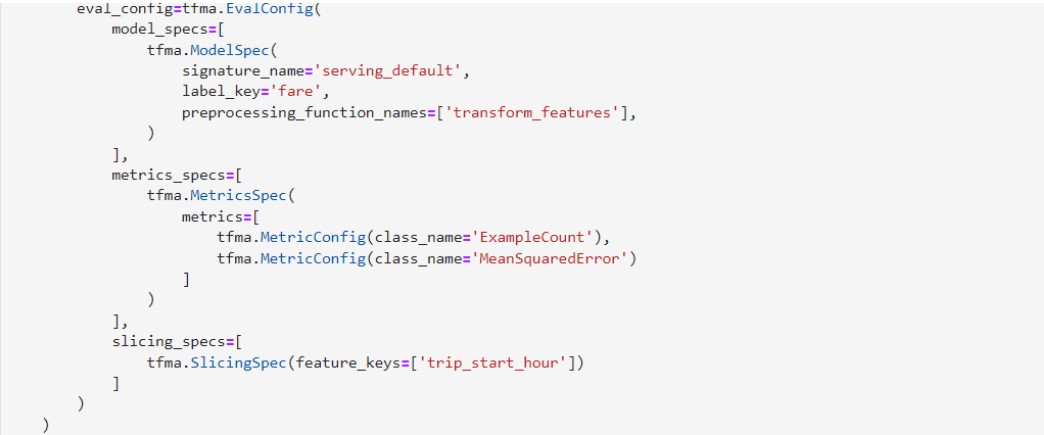

#### Performance Evaluation and Optimization:
##### Hyperparameter Tuning: 
After selecting the most promising models based on initial tests, we conducted extensive hyperparameter tuning using Grid Search CV. This process was aimed at optimizing the models to enhance their predictive performance by systematically testing a wide range of parameter combinations.

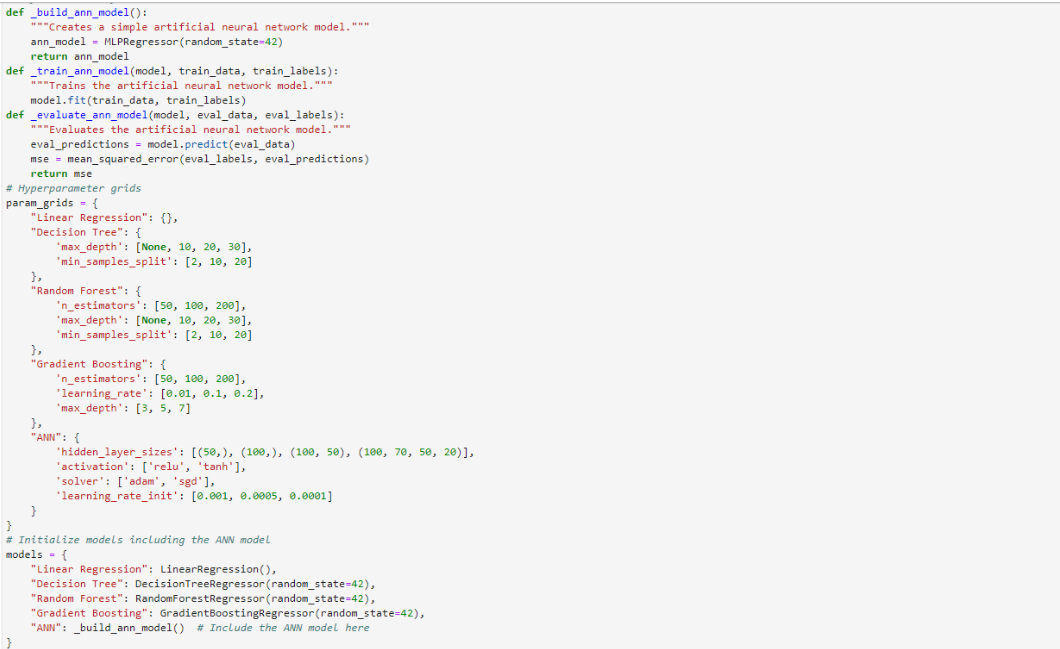

#### Bias and Variance Trade-offs
During the model development phase, we extensively analyzed the performance metrics from training and validation phases to evaluate the model’s bias and variance. Adjustments were made to the model architecture and training procedure to balance underfitting and overfitting, utilizing techniques like dropout and batch normalization to enhance model generalizability without compromising training efficiency.

## 3.1.3.7 Machine Learning Model Evaluation
Evaluation Context
The machine learning model developed for predicting cab fare prices in Chicago was rigorously evaluated to ensure its effectiveness and reliability. The evaluation focused on assessing the model's performance on an independent test dataset that closely mirrors the real-world data it will encounter once deployed.

#### Model Selection and Performance Metrics
The primary model selected for the final deployment, based on extensive testing, was an Artificial Neural Network (ANN). This decision was driven by the model's superior performance metrics compared to alternatives such as Decision Tree, Random Forest, and Gradient Boosting Regressors.

#### Evaluation Metrics Used
The model was evaluated using several metrics to ensure a comprehensive analysis:

##### Mean Squared Error (MSE): 
Provides a measure of the average squared difference between the observed and predicted values.
##### Root Mean Squared Error (RMSE): 
Represents the square root of MSE, providing an error metric in the same units as the fare prices, making it interpretable.
##### R-Squared (R2): 
Measures the proportion of variance in the dependent variable that is predictable from the independent variables, giving an insight into the goodness of fit.

#### Model Testing and Results
The ANN model was tested using a grid search to fine-tune hyperparameters, ensuring optimal performance. The final results highlighted the model's ability to effectively predict fare 
prices with a high degree of accuracy. The testing phase involved:

1)Training the model on a subset of the dataset while reserving a portion for testing to avoid overfitting.

2)Evaluating the model's performance on the test set to ensure that it generalizes well to new, unseen data.

The performance of the ANN model on the test set was particularly noteworthy, achieving a low MSE and a high R2 score, indicating a strong predictive power and a significant improvement over baseline models.

# 3.1.4 Proof of Deployment
#### 3.1.4.1 Model/Application on Google Cloud
The deployment of our machine learning model on Google Cloud leverages the robust capabilities of Vertex AI and Kubeflow, providing a scalable, secure, and highly available environment. This strategic choice ensures optimal performance and reliability, crucial for maintaining high service levels required by enterprise-grade applications.

Project Details:

Project Name: brldi-gcpcapabilities-ai-audit
Project ID: 971203737354
Hosting our solution on Google Cloud facilitates not only seamless scalability to handle varying loads but also robust management features that ensure continuous operational excellence. Vertex AI integrates with our model to provide advanced ML operations capabilities such as model monitoring, automated scaling, and pipeline management, essential for the ongoing accuracy and performance of deployed models.

#### 3.1.4.2 Callable Library/Application
Our machine learning model is deployed as a callable library, making it accessible through a well-defined API that supports real-time predictions. This design ensures that the model can be easily integrated into various production environments, where decisions must be made quickly and reliably.

API Usage Example:
Here’s how developers can utilize the API to invoke our model, demonstrating the simplicity and efficiency of integrating our machine learning capabilities into any application:

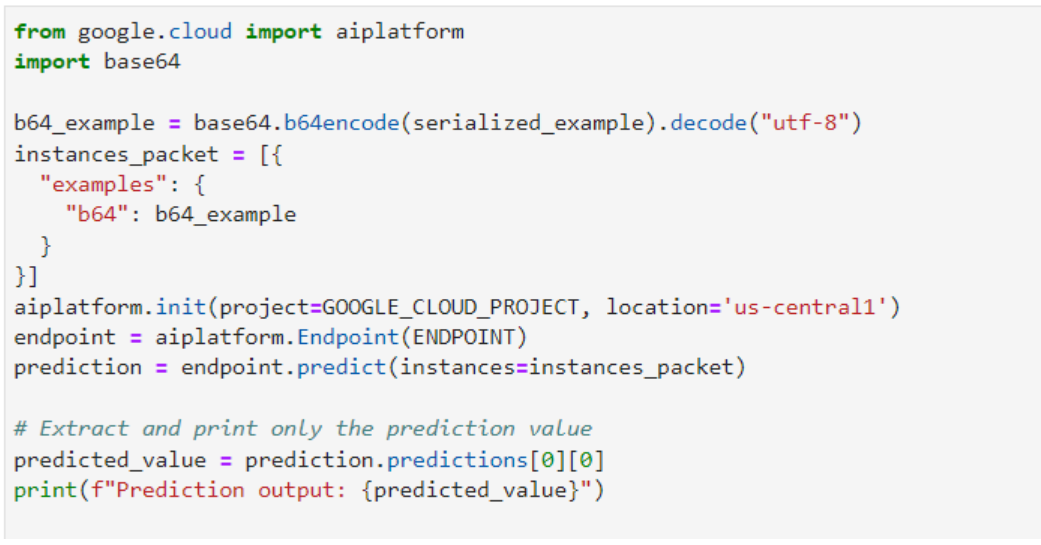

This snippet illustrates the practical application of our deployed model, emphasizing its readiness for real-world use and the ease with which developers can integrate it into existing systems.

#### 3.1.4.3 Editable Model/Application
Flexibility and adaptability are key features of our deployment strategy. The model is not only fully operational but also customizable, allowing end-users to modify it according to their specific operational requirements.

#### Customization Example:
Modifications can range from parameter adjustments and incorporating new data for retraining, to more significant architectural changes. Such flexibility is critical for adapting to evolving business needs and data environments, ensuring the model continues to perform optimally.

The customization capability demonstrates our commitment to delivering a sustainable and adaptable machine learning solution that can evolve in alignment with customer needs, maintaining relevance and effectiveness in a rapidly changing business landscape.